In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [185]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\archive (1)\EastWestAirlines.csv")
df

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  
0         0  
1         0  
2         0  
3         0  
4         1  
...     ...  
3994      1  
3995      1  
3996      1  
3997      0  
3998      0  

[3999 rows x 12 columns]

In [186]:
df.iloc[:,5]

0       1
1       1
2       1
3       1
4       1
       ..
3994    1
3995    1
3996    1
3997    1
3998    1
Name: cc3_miles, Length: 3999, dtype: int64

In [187]:
df.describe().T

count          mean            std  min      25%      50%  \
ID                 3999.0   2014.819455    1160.764358  1.0   1010.5   2016.0   
Balance            3999.0  73601.327582  100775.664958  0.0  18527.5  43097.0   
Qual_miles         3999.0    144.114529     773.663804  0.0      0.0      0.0   
cc1_miles          3999.0      2.059515       1.376919  1.0      1.0      1.0   
cc2_miles          3999.0      1.014504       0.147650  1.0      1.0      1.0   
cc3_miles          3999.0      1.012253       0.195241  1.0      1.0      1.0   
Bonus_miles        3999.0  17144.846212   24150.967826  0.0   1250.0   7171.0   
Bonus_trans        3999.0     11.601900       9.603810  0.0      3.0     12.0   
Flight_miles_12mo  3999.0    460.055764    1400.209171  0.0      0.0      0.0   
Flight_trans_12    3999.0      1.373593       3.793172  0.0      0.0      0.0   
Days_since_enroll  3999.0   4118.559390    2065.134540  2.0   2330.0   4096.0   
Award              3999.0      0.370343       0.482957  0.0      0.0      0.0   

                       75%        max  
ID                  3020.5     4021.0  
Balance            92404.0  1704838.0  
Qual_miles             0.0    11148.0  
cc1_miles              3.0        5.0  
cc2_miles              1.0        3.0  
cc3_miles              1.0        5.0  
Bonus_miles        23800.5   263685.0  
Bonus_trans           17.0       86.0  
Flight_miles_12mo    311.0    30817.0  
Flight_trans_12        1.0       53.0  
Days_since_enroll   5790.5     8296.0  
Award                  1.0        1.0

In [188]:
df.drop("ID",axis=1,inplace=True)
df.head(1)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
0            1                  0                0               7000      0

In [189]:
df.columns=df.columns.str.lower()
df.head(1)

balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  bonus_miles  \
0    28143           0          1          1          1          174   

   bonus_trans  flight_miles_12mo  flight_trans_12  days_since_enroll  award  
0            1                  0                0               7000      0

In [190]:
df.describe().T

count          mean            std  min      25%      50%  \
balance            3999.0  73601.327582  100775.664958  0.0  18527.5  43097.0   
qual_miles         3999.0    144.114529     773.663804  0.0      0.0      0.0   
cc1_miles          3999.0      2.059515       1.376919  1.0      1.0      1.0   
cc2_miles          3999.0      1.014504       0.147650  1.0      1.0      1.0   
cc3_miles          3999.0      1.012253       0.195241  1.0      1.0      1.0   
bonus_miles        3999.0  17144.846212   24150.967826  0.0   1250.0   7171.0   
bonus_trans        3999.0     11.601900       9.603810  0.0      3.0     12.0   
flight_miles_12mo  3999.0    460.055764    1400.209171  0.0      0.0      0.0   
flight_trans_12    3999.0      1.373593       3.793172  0.0      0.0      0.0   
days_since_enroll  3999.0   4118.559390    2065.134540  2.0   2330.0   4096.0   
award              3999.0      0.370343       0.482957  0.0      0.0      0.0   

                       75%        max  
balance            92404.0  1704838.0  
qual_miles             0.0    11148.0  
cc1_miles              3.0        5.0  
cc2_miles              1.0        3.0  
cc3_miles              1.0        5.0  
bonus_miles        23800.5   263685.0  
bonus_trans           17.0       86.0  
flight_miles_12mo    311.0    30817.0  
flight_trans_12        1.0       53.0  
days_since_enroll   5790.5     8296.0  
award                  1.0        1.0

In [191]:
df.award.value_counts()

0    2518
1    1481
Name: award, dtype: int64

In [192]:
df.cc1_miles.value_counts()

1    2289
3     613
4     525
5     288
2     284
Name: cc1_miles, dtype: int64

In [193]:
df.cc2_miles.value_counts()

1    3956
2      28
3      15
Name: cc2_miles, dtype: int64

In [194]:
df.cc3_miles.value_counts()

1    3981
4       6
5       5
3       4
2       3
Name: cc3_miles, dtype: int64

In [21]:
#Data Preprocessing:
#handling missing values
df.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [195]:
cat_list=[]
num_list=[]


for i in df.columns:
    unique_values = len(df[i].unique())
    if unique_values<10:
        cat_list.append(i)
    else:
        num_list.append(i)

In [196]:
cat_list

['cc1_miles', 'cc2_miles', 'cc3_miles', 'award']

In [197]:
num_list

['balance',
 'qual_miles',
 'bonus_miles',
 'bonus_trans',
 'flight_miles_12mo',
 'flight_trans_12',
 'days_since_enroll']

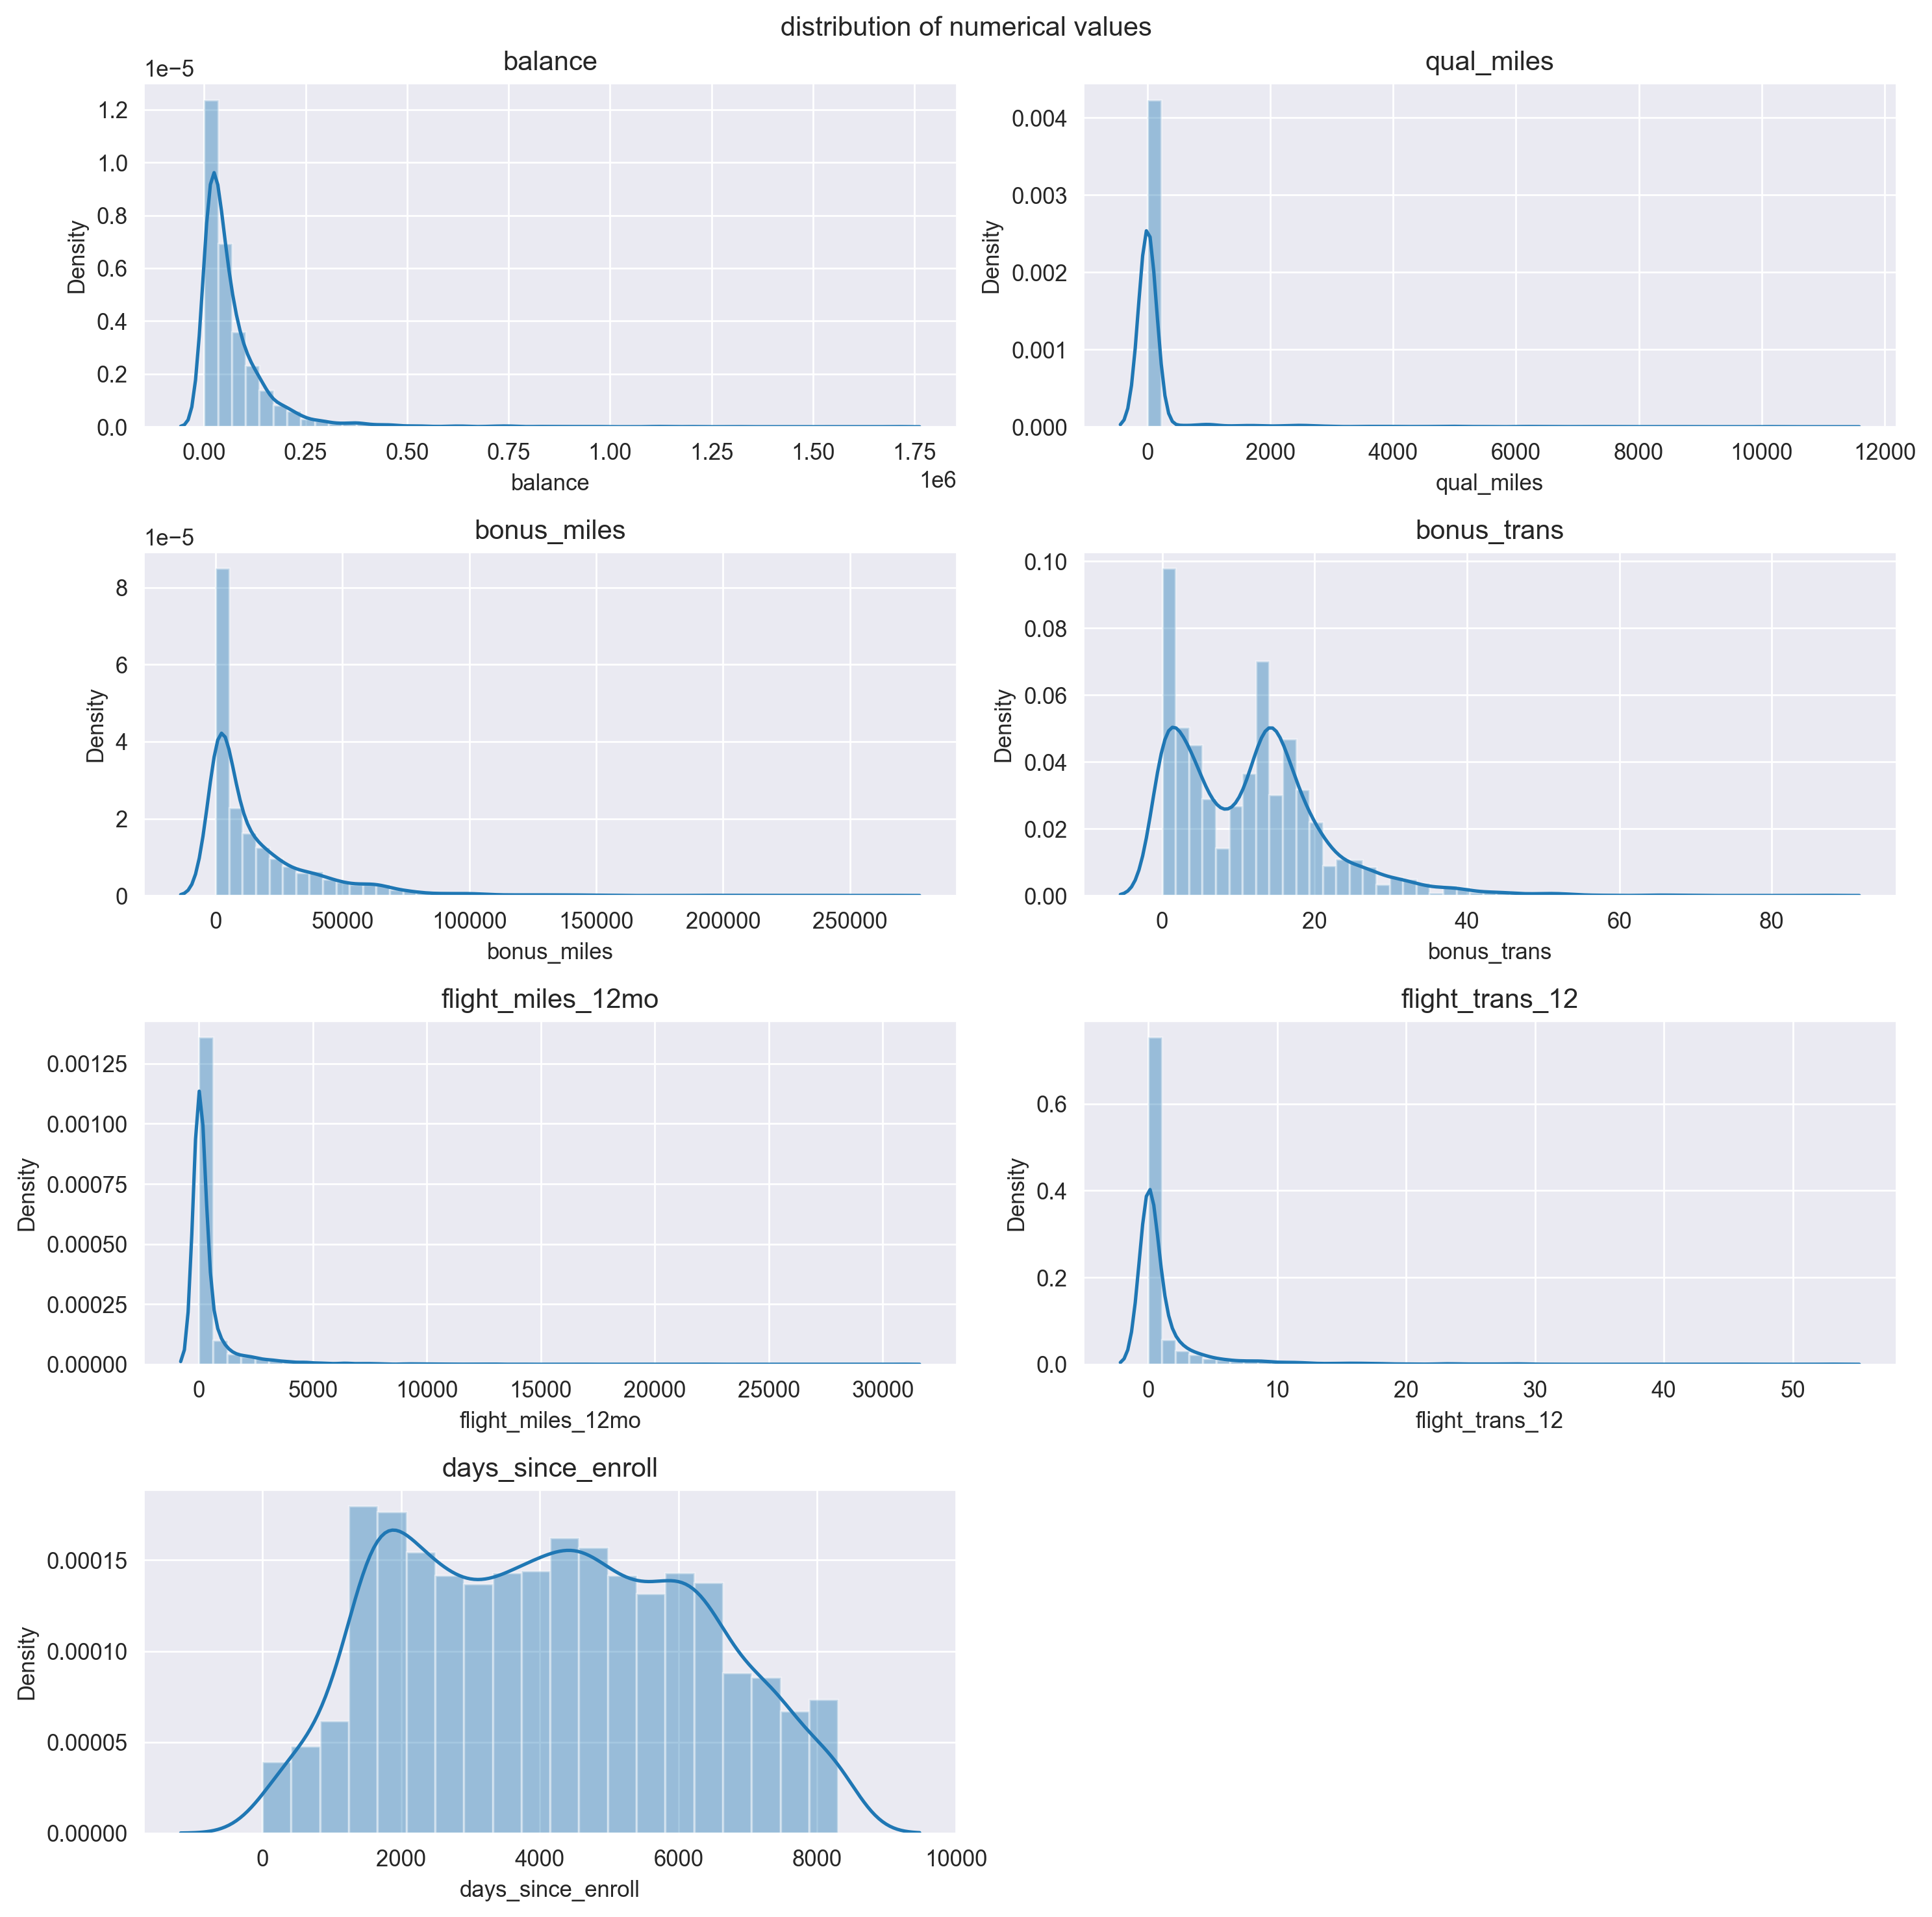

In [198]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")
for i in df.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.distplot(df[i])
    plt.title(i)
    plt.tight_layout()
    k+=1

In [199]:
for i in df.loc[:,num_list]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

balance yes
qual_miles yes
bonus_miles yes
bonus_trans yes
flight_miles_12mo yes
flight_trans_12 yes
days_since_enroll no


In [200]:
df.describe().T

count          mean            std  min      25%      50%  \
balance            3999.0  73601.327582  100775.664958  0.0  18527.5  43097.0   
qual_miles         3999.0    144.114529     773.663804  0.0      0.0      0.0   
cc1_miles          3999.0      2.059515       1.376919  1.0      1.0      1.0   
cc2_miles          3999.0      1.014504       0.147650  1.0      1.0      1.0   
cc3_miles          3999.0      1.012253       0.195241  1.0      1.0      1.0   
bonus_miles        3999.0  17144.846212   24150.967826  0.0   1250.0   7171.0   
bonus_trans        3999.0     11.601900       9.603810  0.0      3.0     12.0   
flight_miles_12mo  3999.0    460.055764    1400.209171  0.0      0.0      0.0   
flight_trans_12    3999.0      1.373593       3.793172  0.0      0.0      0.0   
days_since_enroll  3999.0   4118.559390    2065.134540  2.0   2330.0   4096.0   
award              3999.0      0.370343       0.482957  0.0      0.0      0.0   

                       75%        max  
balance            92404.0  1704838.0  
qual_miles             0.0    11148.0  
cc1_miles              3.0        5.0  
cc2_miles              1.0        3.0  
cc3_miles              1.0        5.0  
bonus_miles        23800.5   263685.0  
bonus_trans           17.0       86.0  
flight_miles_12mo    311.0    30817.0  
flight_trans_12        1.0       53.0  
days_since_enroll   5790.5     8296.0  
award                  1.0        1.0

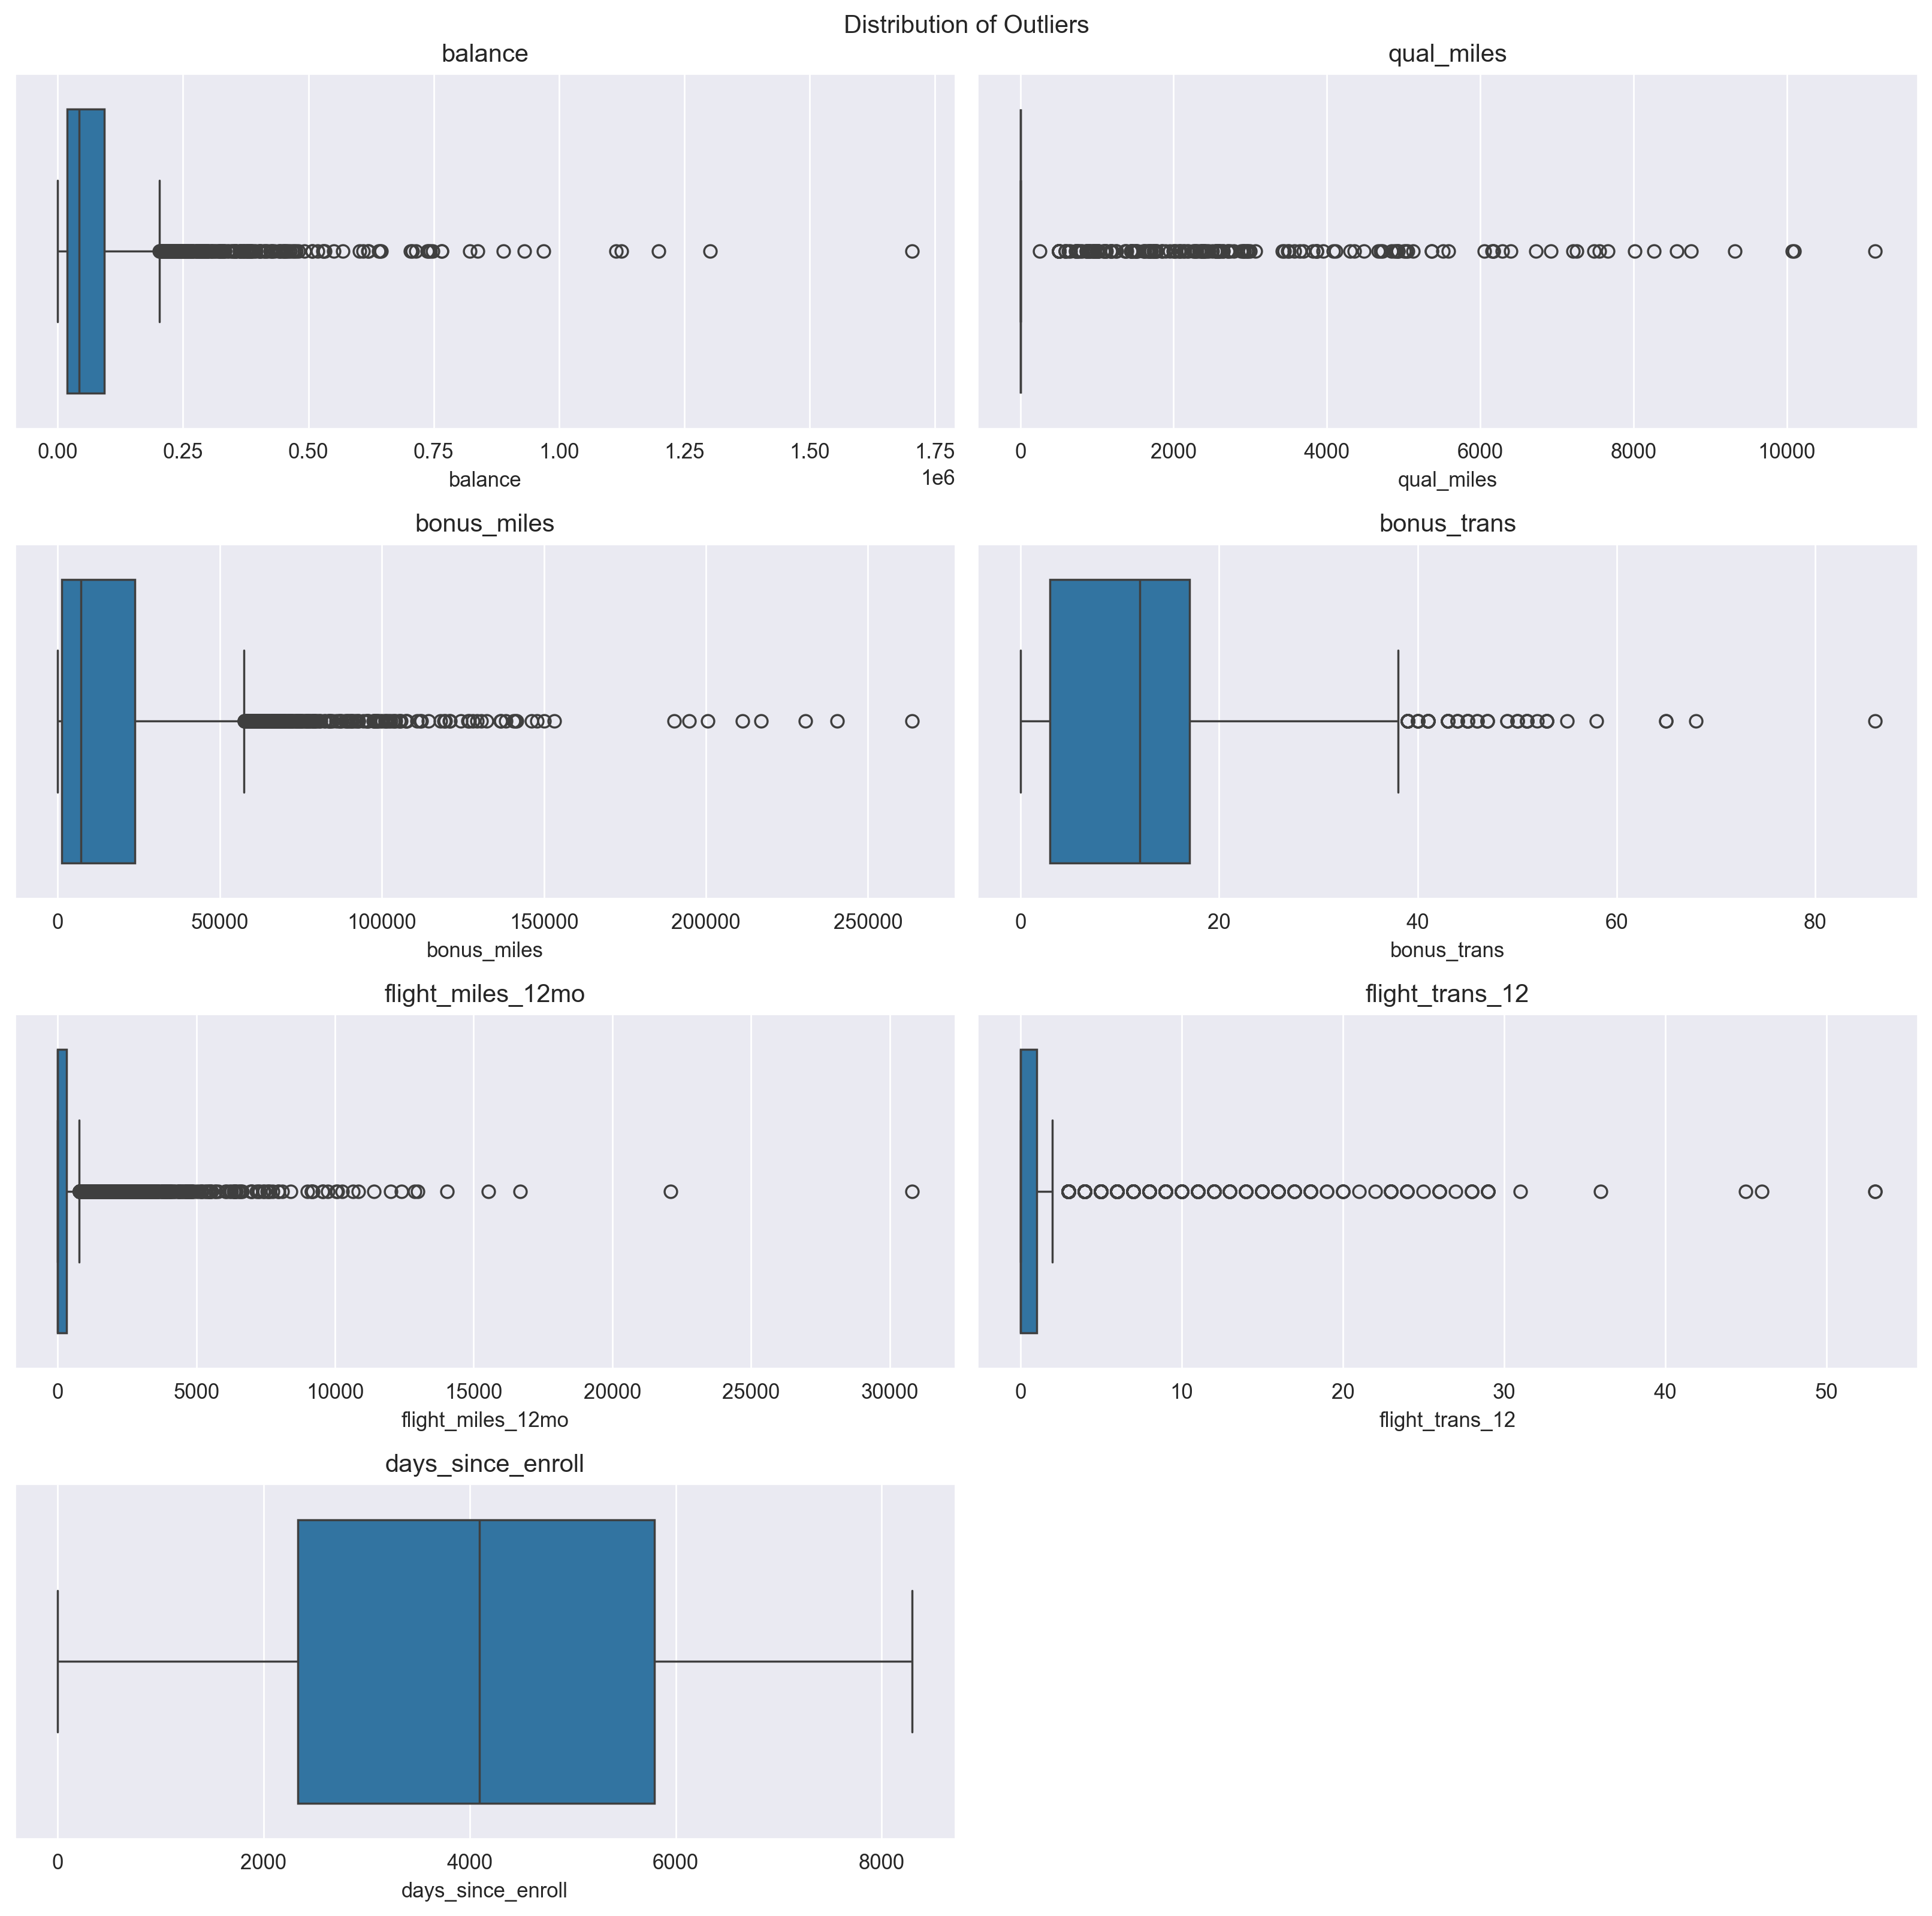

In [201]:
k=1
plt.figure(figsize=(13,13))
plt.suptitle("Distribution of Outliers")

for i in df.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.boxplot(x = i, data = df.loc[:,num_list])
    plt.title(i)
    plt.tight_layout()
    k+=1

In [202]:
out_list=["bonus_trans","flight_miles_12mo","flight_trans_12"]

# remove outliers;

for i in df.loc[:,out_list]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df.loc[df[i] > up_lim,i] = up_lim
    df.loc[df[i] < low_lim,i] = low_lim

In [203]:
df.describe().T

count          mean            std  min      25%      50%  \
balance            3999.0  73601.327582  100775.664958  0.0  18527.5  43097.0   
qual_miles         3999.0    144.114529     773.663804  0.0      0.0      0.0   
cc1_miles          3999.0      2.059515       1.376919  1.0      1.0      1.0   
cc2_miles          3999.0      1.014504       0.147650  1.0      1.0      1.0   
cc3_miles          3999.0      1.012253       0.195241  1.0      1.0      1.0   
bonus_miles        3999.0  17144.846212   24150.967826  0.0   1250.0   7171.0   
bonus_trans        3999.0     11.470618       9.115104  0.0      3.0     12.0   
flight_miles_12mo  3999.0    178.055639     294.678028  0.0      0.0      0.0   
flight_trans_12    3999.0      0.591523       0.944826  0.0      0.0      0.0   
days_since_enroll  3999.0   4118.559390    2065.134540  2.0   2330.0   4096.0   
award              3999.0      0.370343       0.482957  0.0      0.0      0.0   

                       75%        max  
balance            92404.0  1704838.0  
qual_miles             0.0    11148.0  
cc1_miles              3.0        5.0  
cc2_miles              1.0        3.0  
cc3_miles              1.0        5.0  
bonus_miles        23800.5   263685.0  
bonus_trans           17.0       38.0  
flight_miles_12mo    311.0      777.5  
flight_trans_12        1.0        2.5  
days_since_enroll   5790.5     8296.0  
award                  1.0        1.0

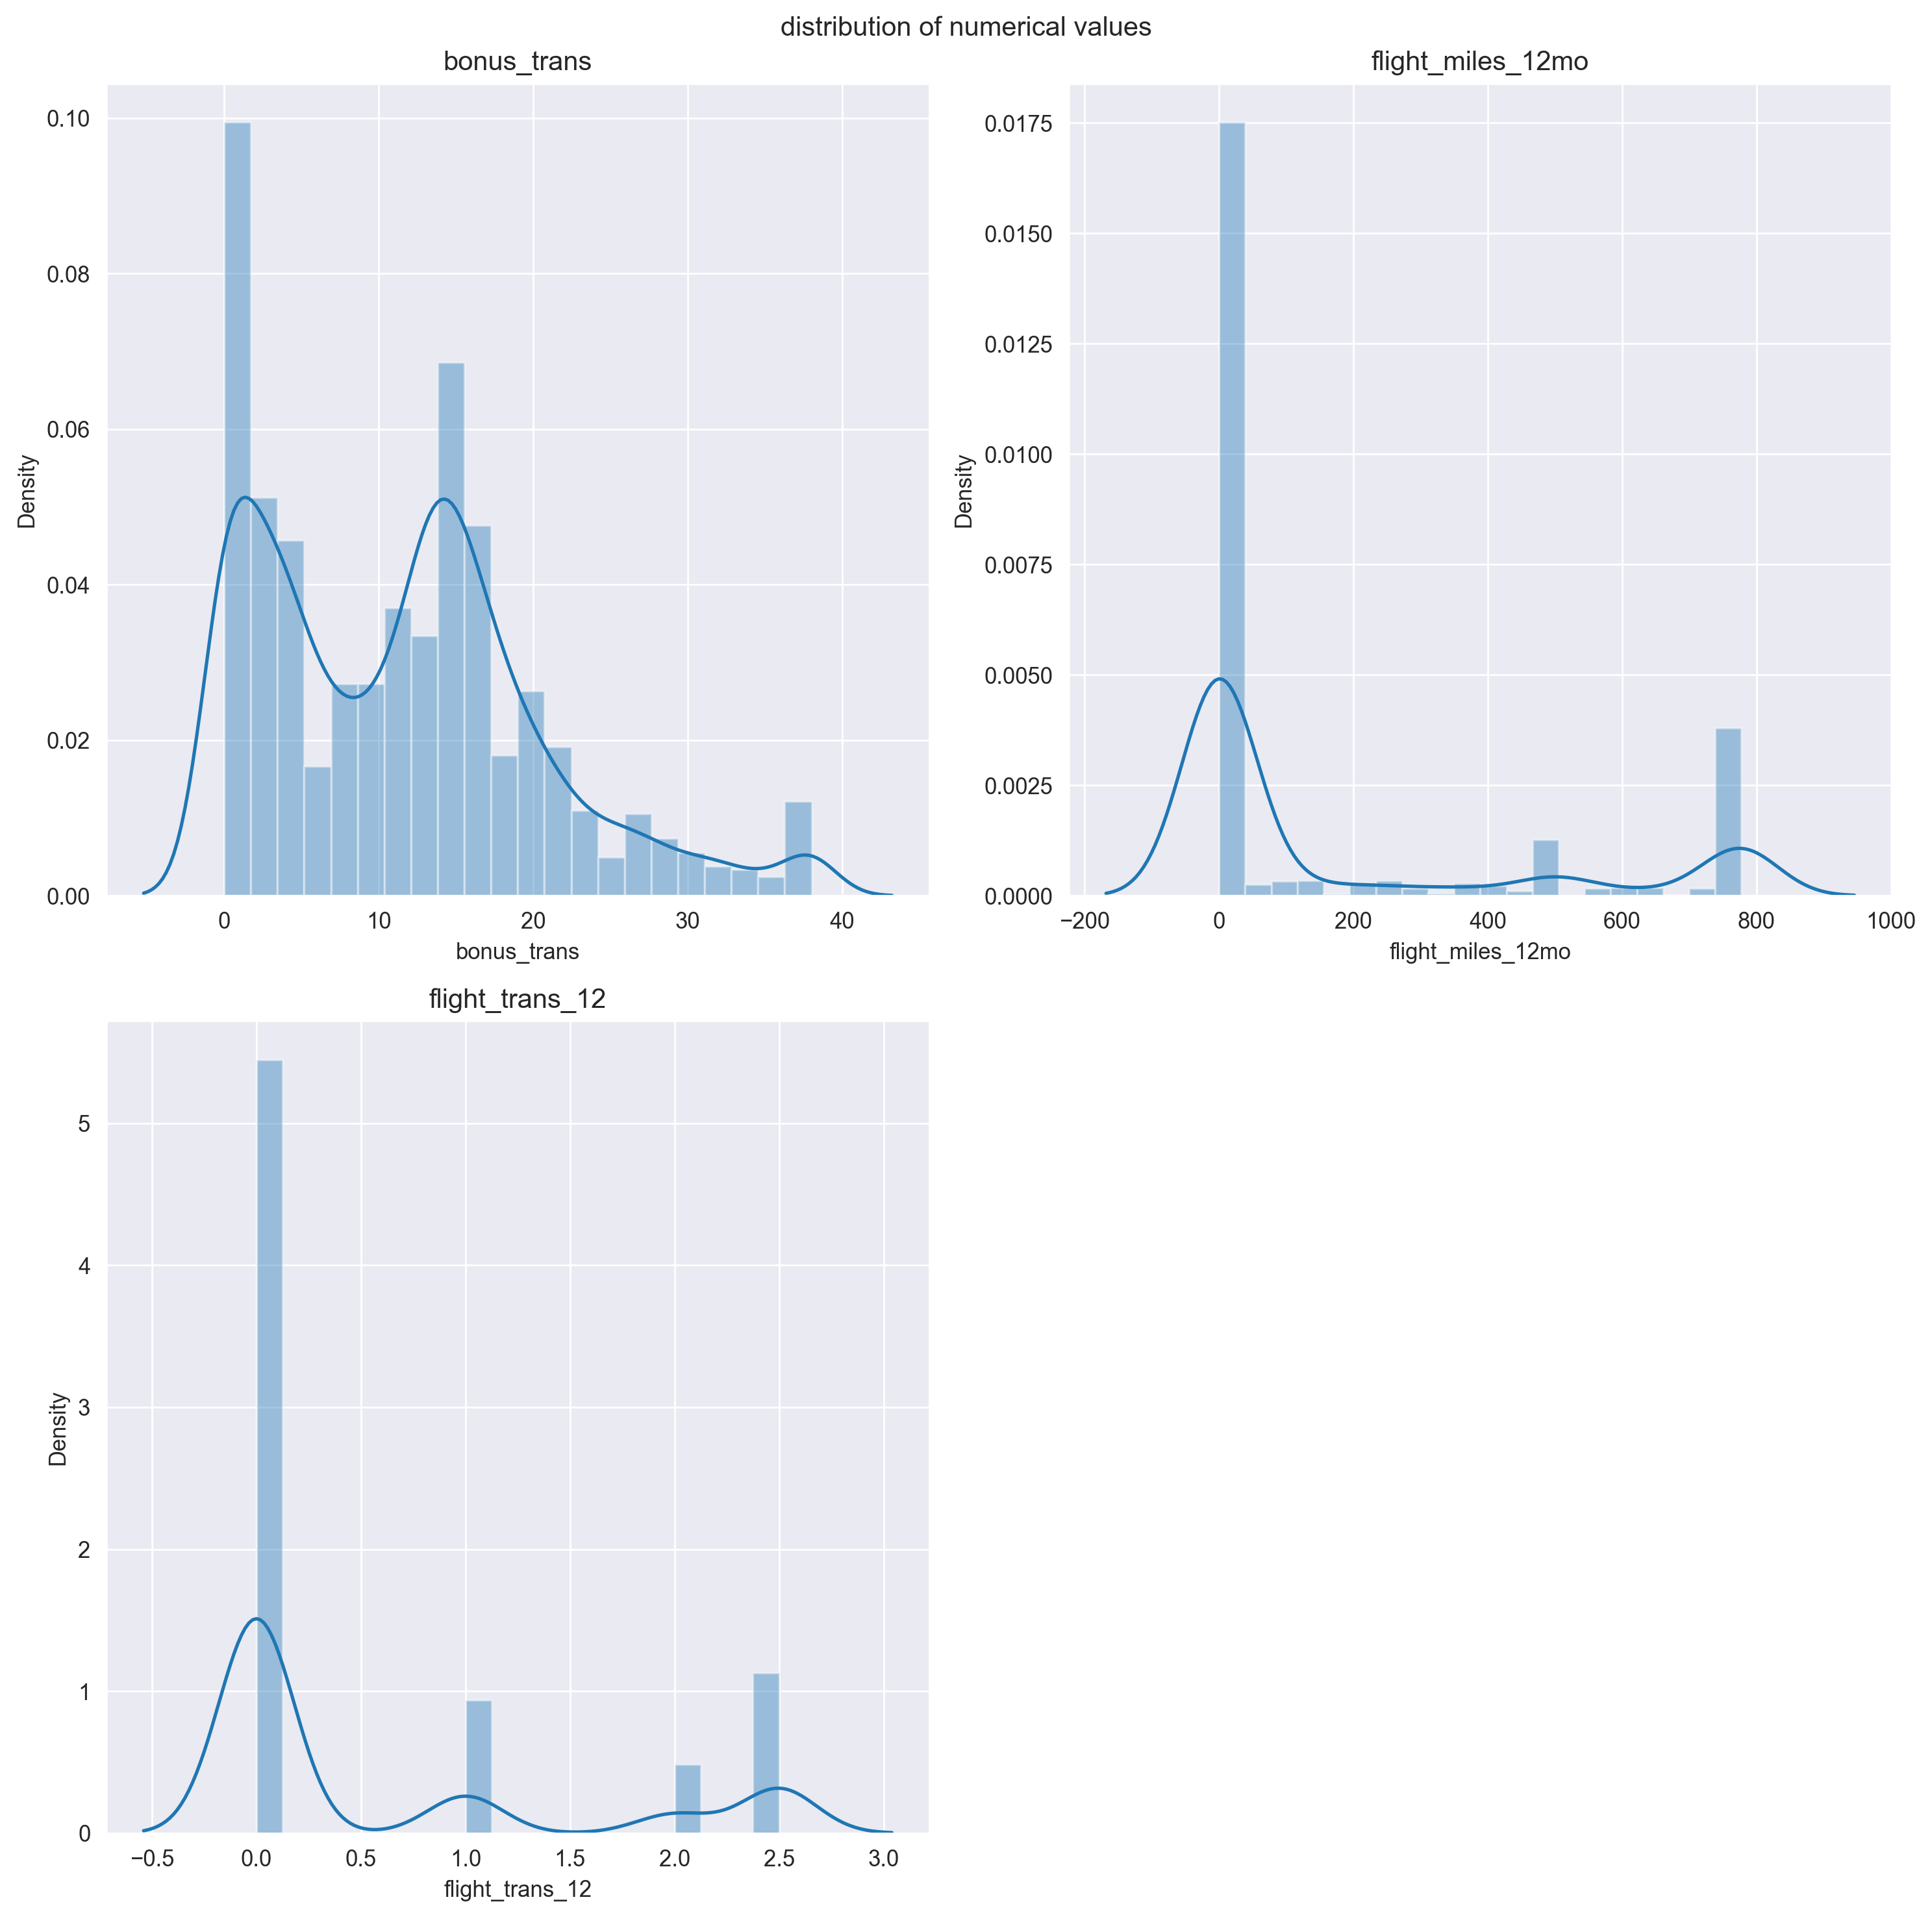

In [204]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")
for i in df.loc[:,out_list]:
    plt.subplot(2,2,k)
    sns.distplot(df[i])
    plt.title(i)
    plt.tight_layout()
    k+=1

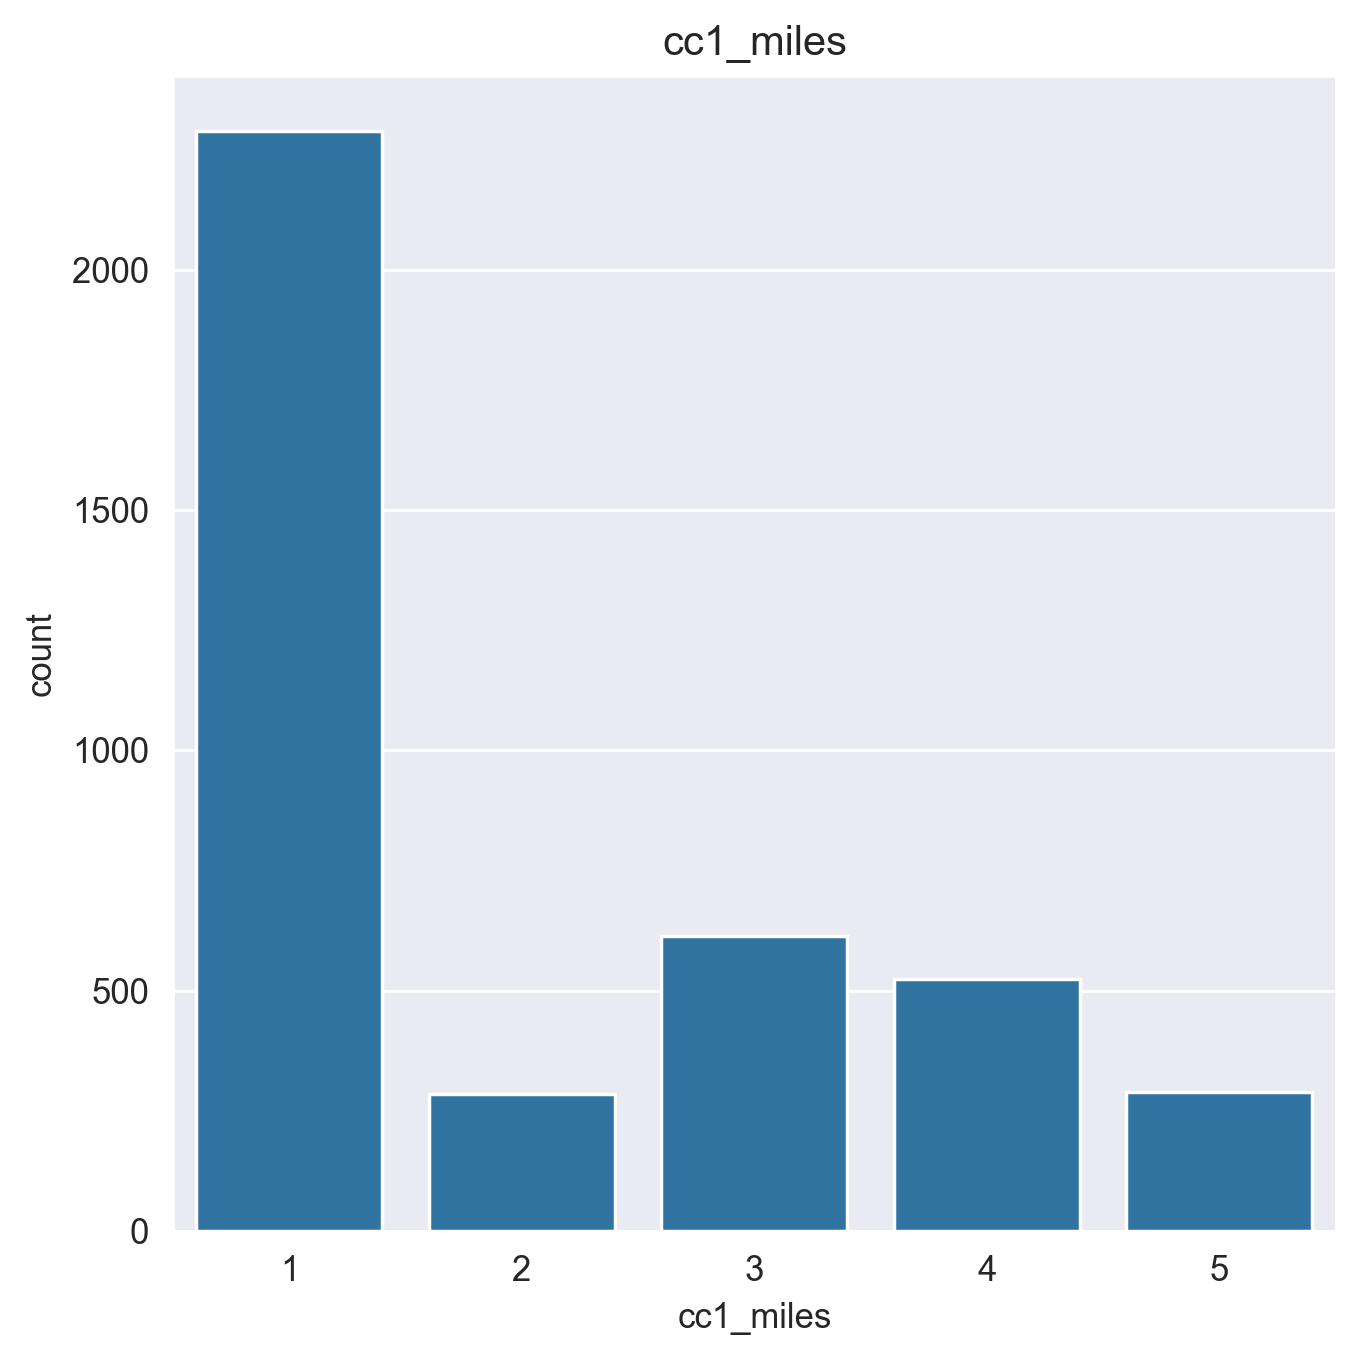

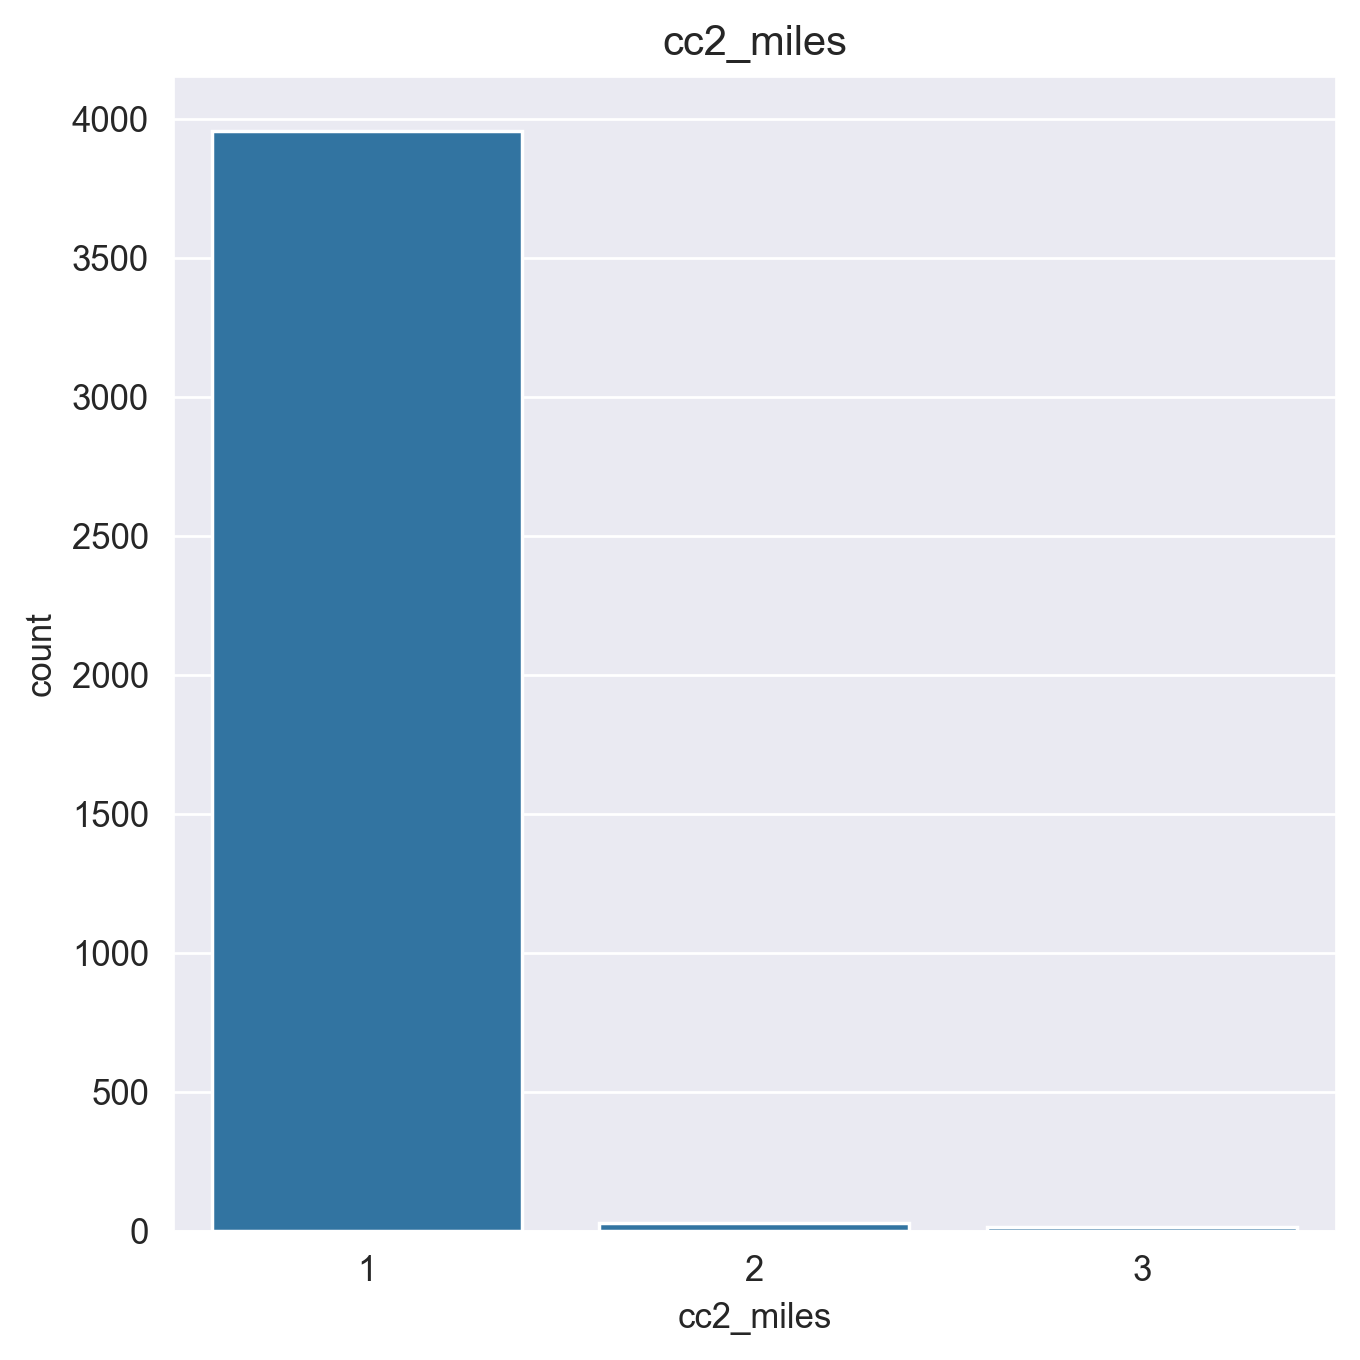

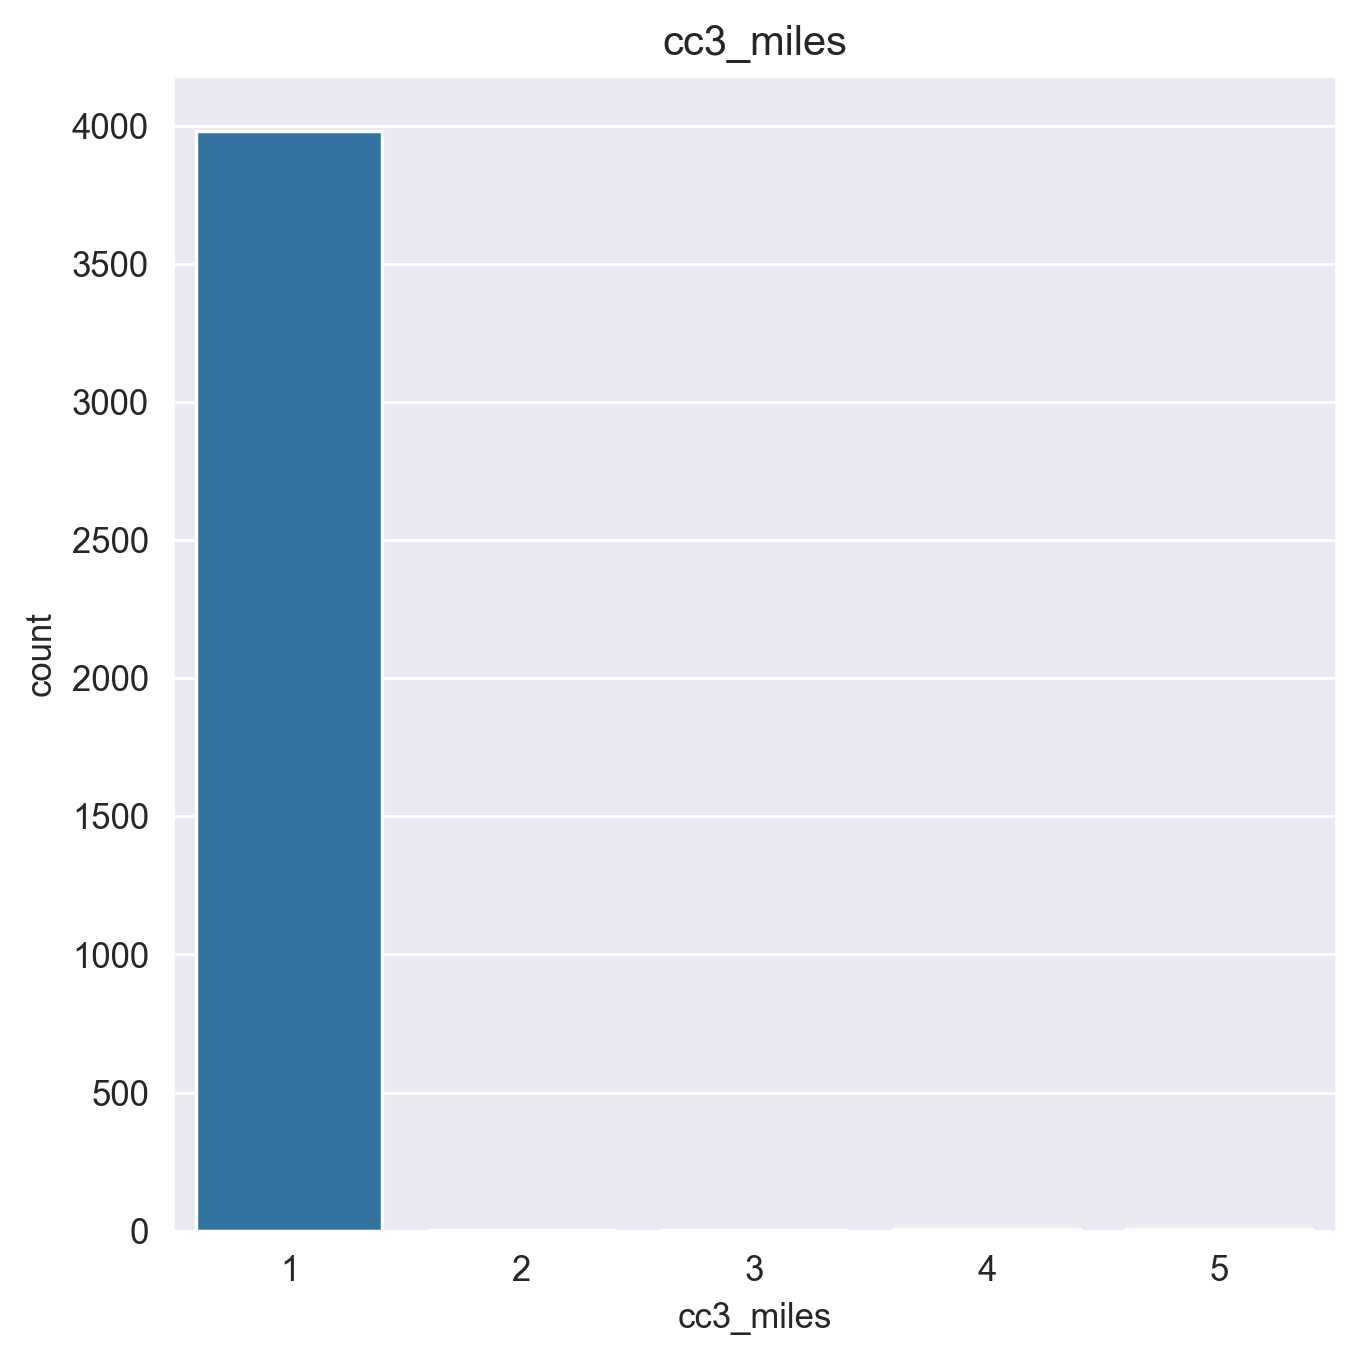

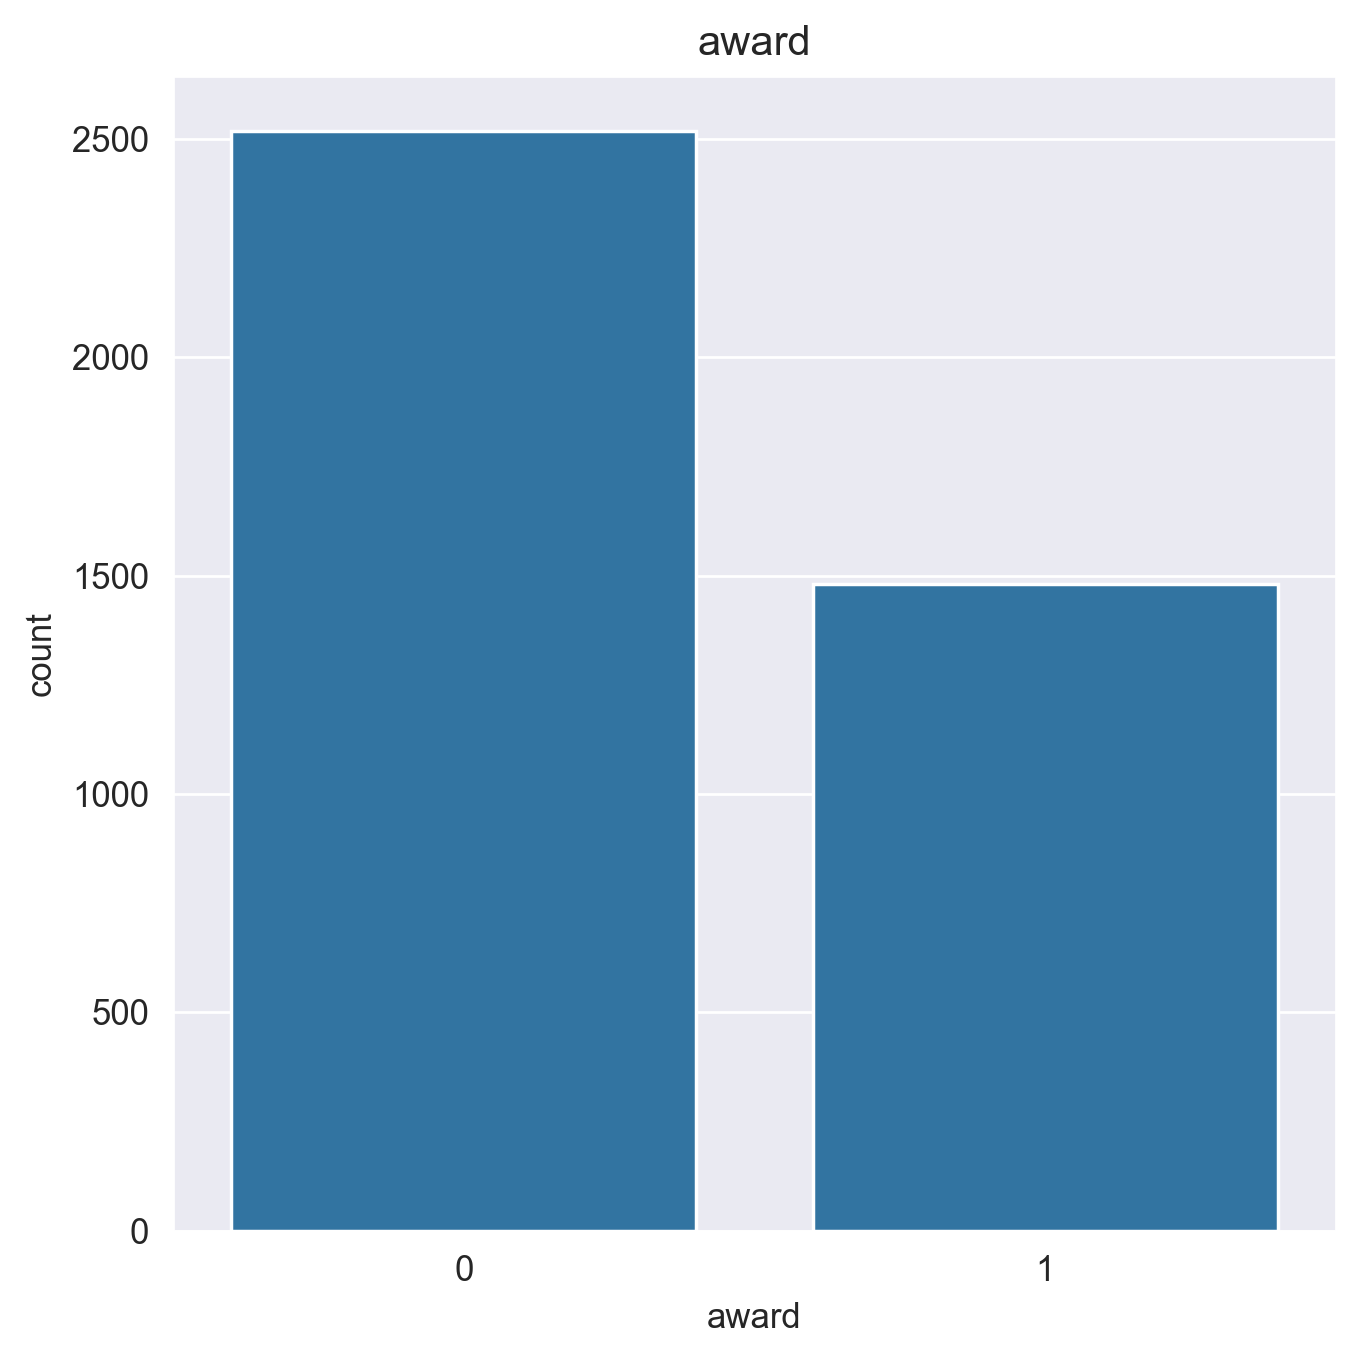

In [205]:
#Categorical Analysis

for i in cat_list:
    plt.figure(figsize=(6,6))
    sns.countplot(x = i, data =df.loc[:,cat_list])
    plt.title(i)

2.Perform exploratory data analysis (EDA) 

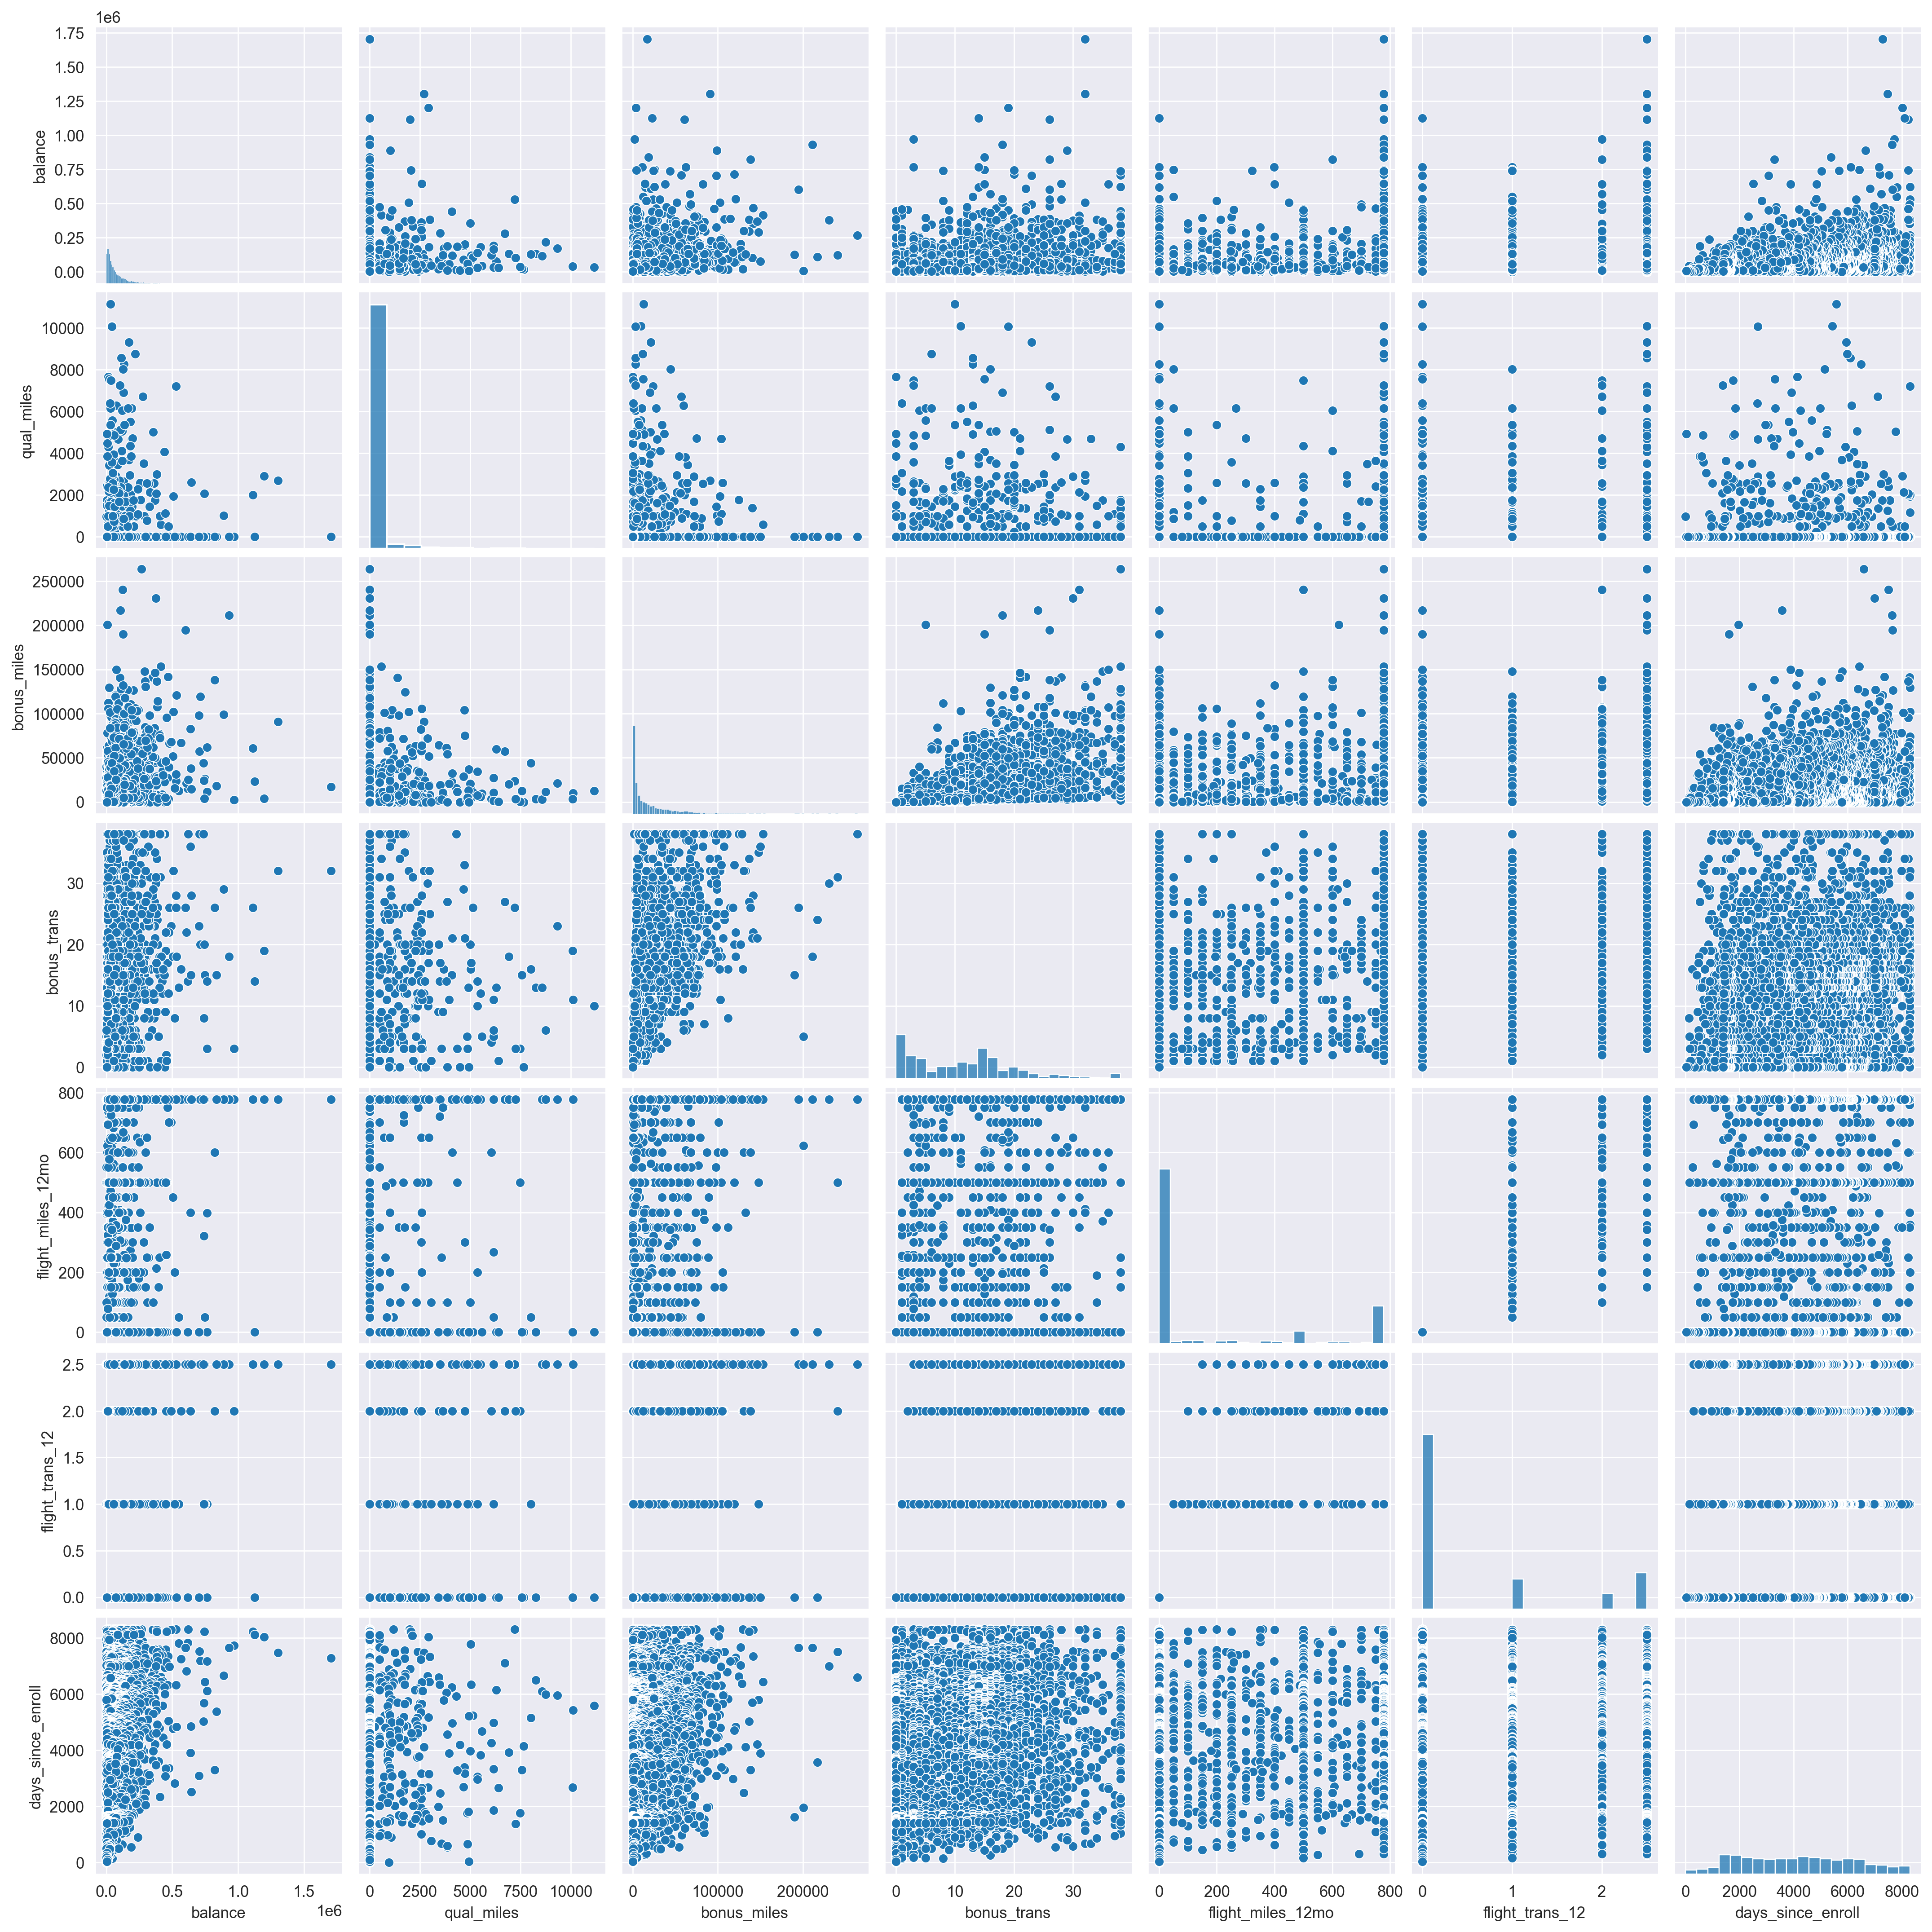

In [206]:
sns.pairplot(df.loc[:,num_list]);

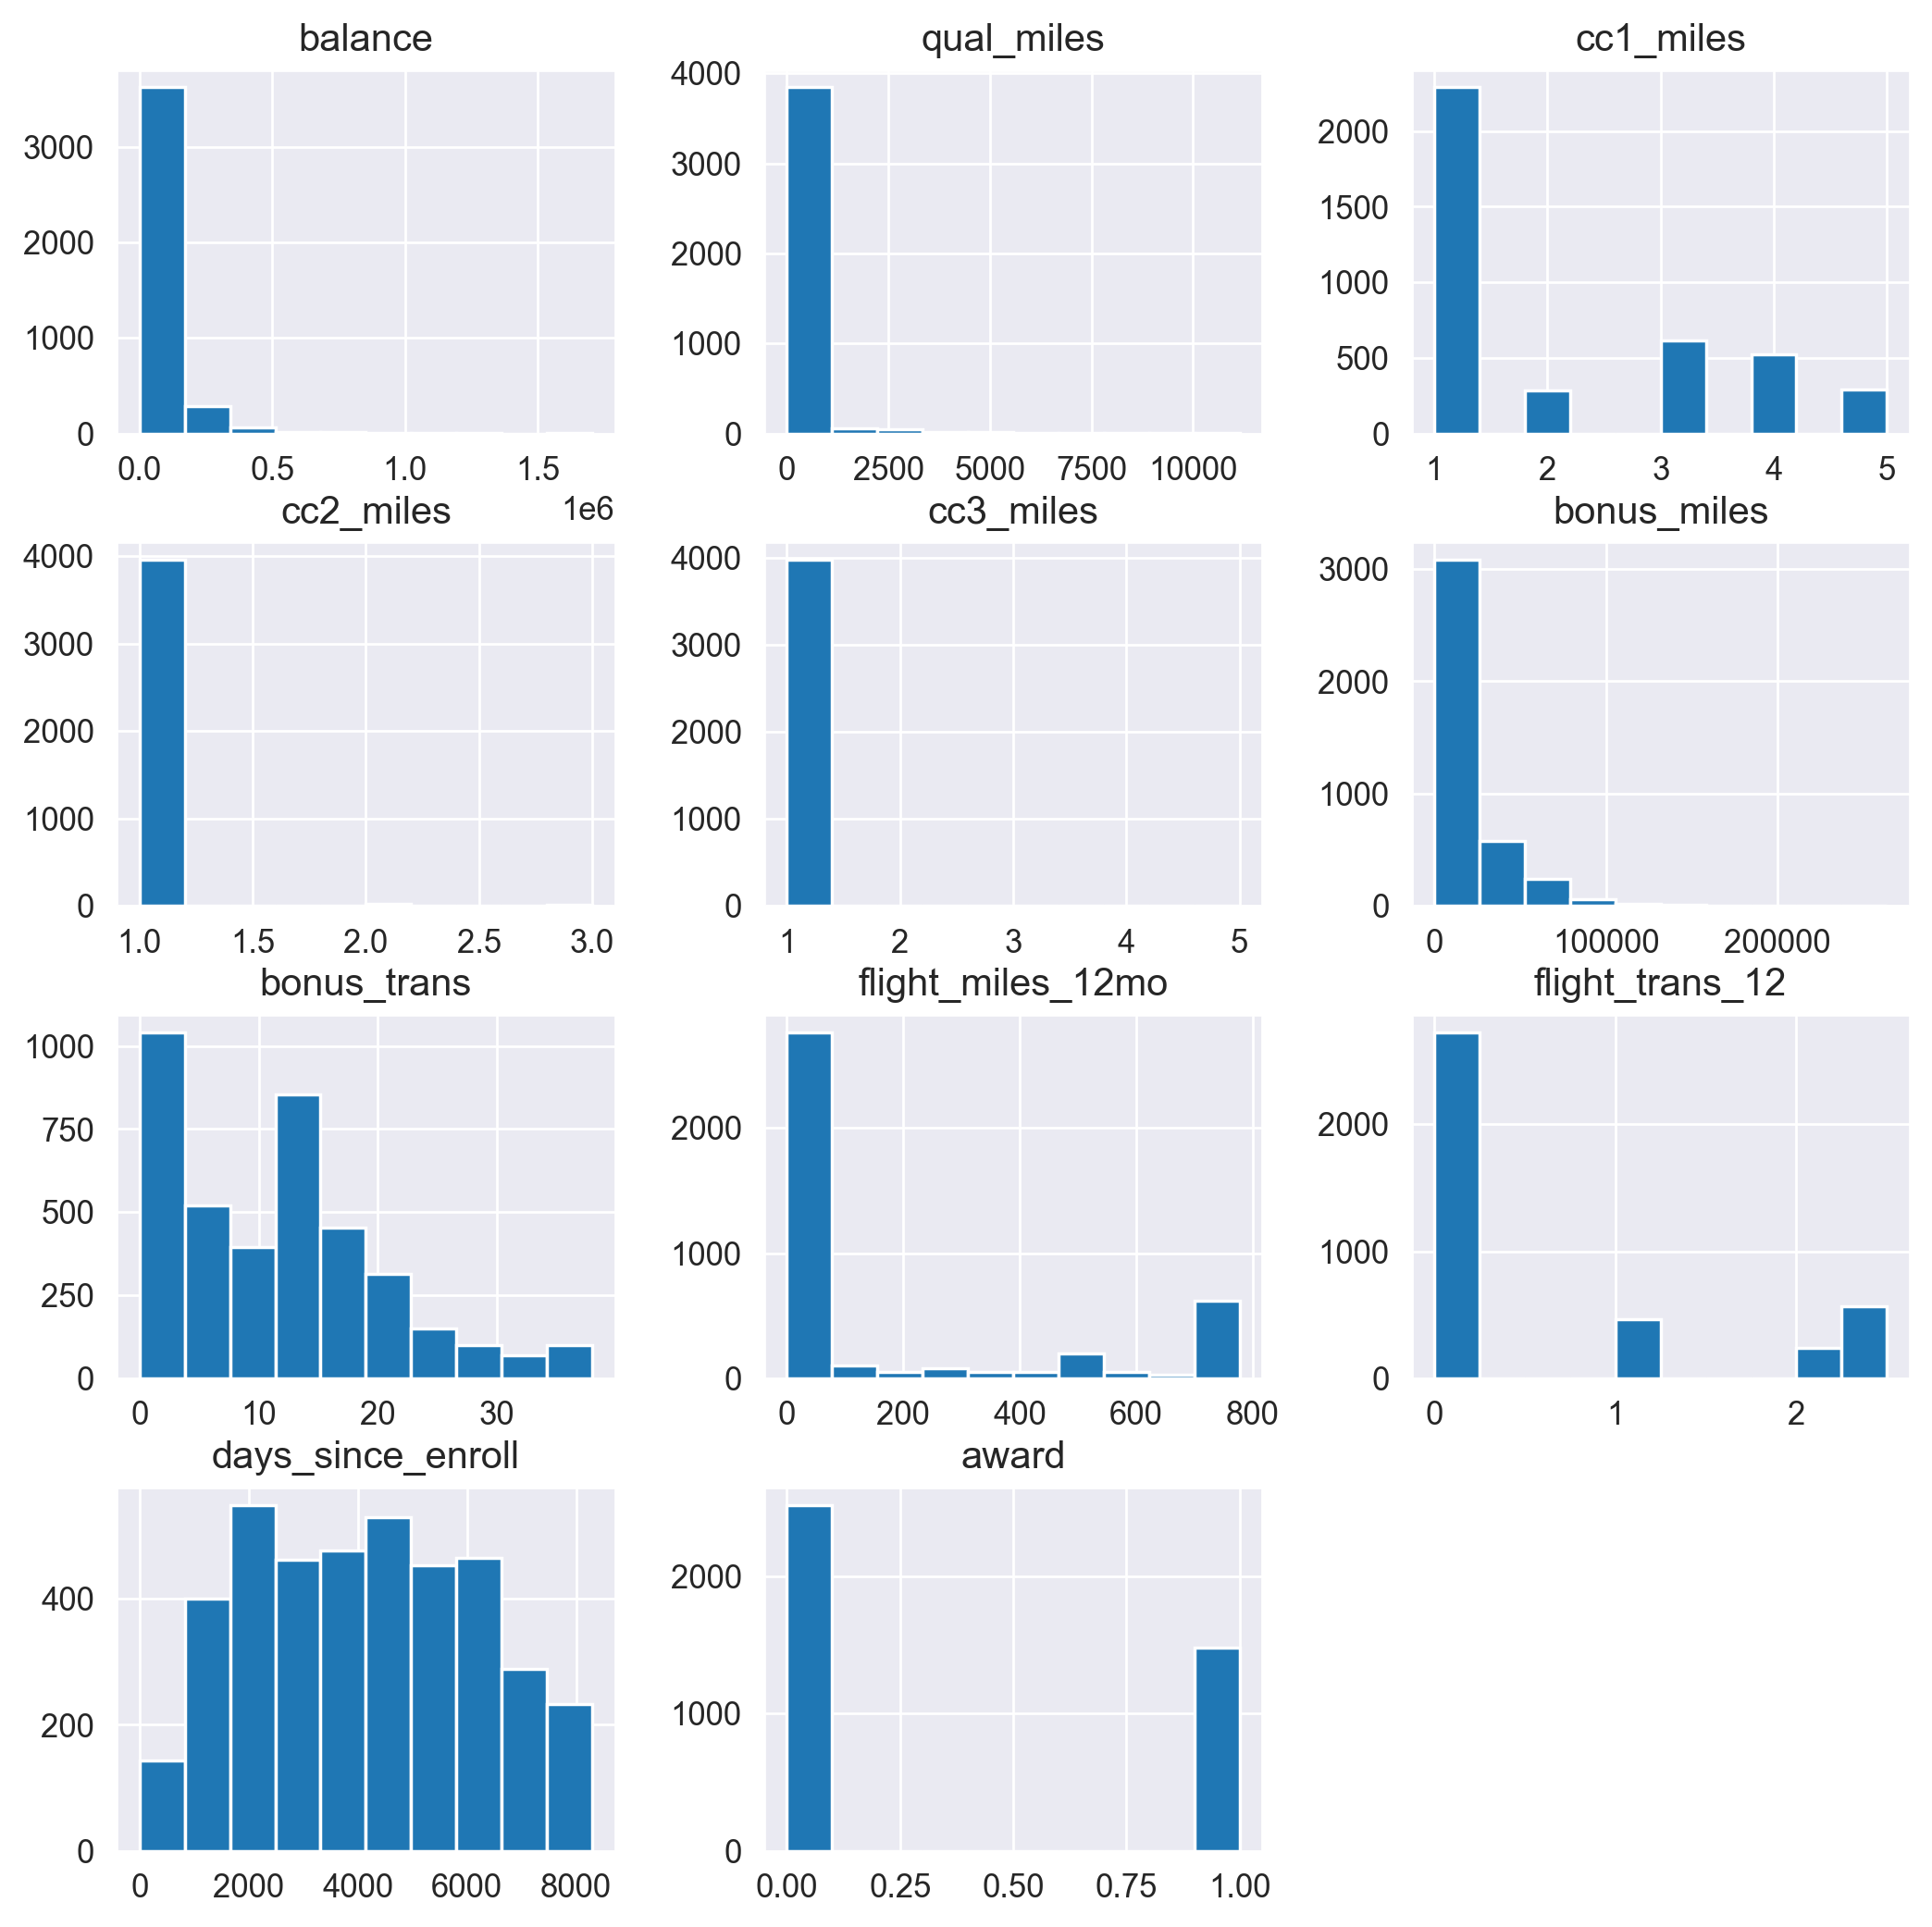

In [207]:
df.hist(figsize=(10,10));

In [208]:
df.describe().T

count          mean            std  min      25%      50%  \
balance            3999.0  73601.327582  100775.664958  0.0  18527.5  43097.0   
qual_miles         3999.0    144.114529     773.663804  0.0      0.0      0.0   
cc1_miles          3999.0      2.059515       1.376919  1.0      1.0      1.0   
cc2_miles          3999.0      1.014504       0.147650  1.0      1.0      1.0   
cc3_miles          3999.0      1.012253       0.195241  1.0      1.0      1.0   
bonus_miles        3999.0  17144.846212   24150.967826  0.0   1250.0   7171.0   
bonus_trans        3999.0     11.470618       9.115104  0.0      3.0     12.0   
flight_miles_12mo  3999.0    178.055639     294.678028  0.0      0.0      0.0   
flight_trans_12    3999.0      0.591523       0.944826  0.0      0.0      0.0   
days_since_enroll  3999.0   4118.559390    2065.134540  2.0   2330.0   4096.0   
award              3999.0      0.370343       0.482957  0.0      0.0      0.0   

                       75%        max  
balance            92404.0  1704838.0  
qual_miles             0.0    11148.0  
cc1_miles              3.0        5.0  
cc2_miles              1.0        3.0  
cc3_miles              1.0        5.0  
bonus_miles        23800.5   263685.0  
bonus_trans           17.0       38.0  
flight_miles_12mo    311.0      777.5  
flight_trans_12        1.0        2.5  
days_since_enroll   5790.5     8296.0  
award                  1.0        1.0

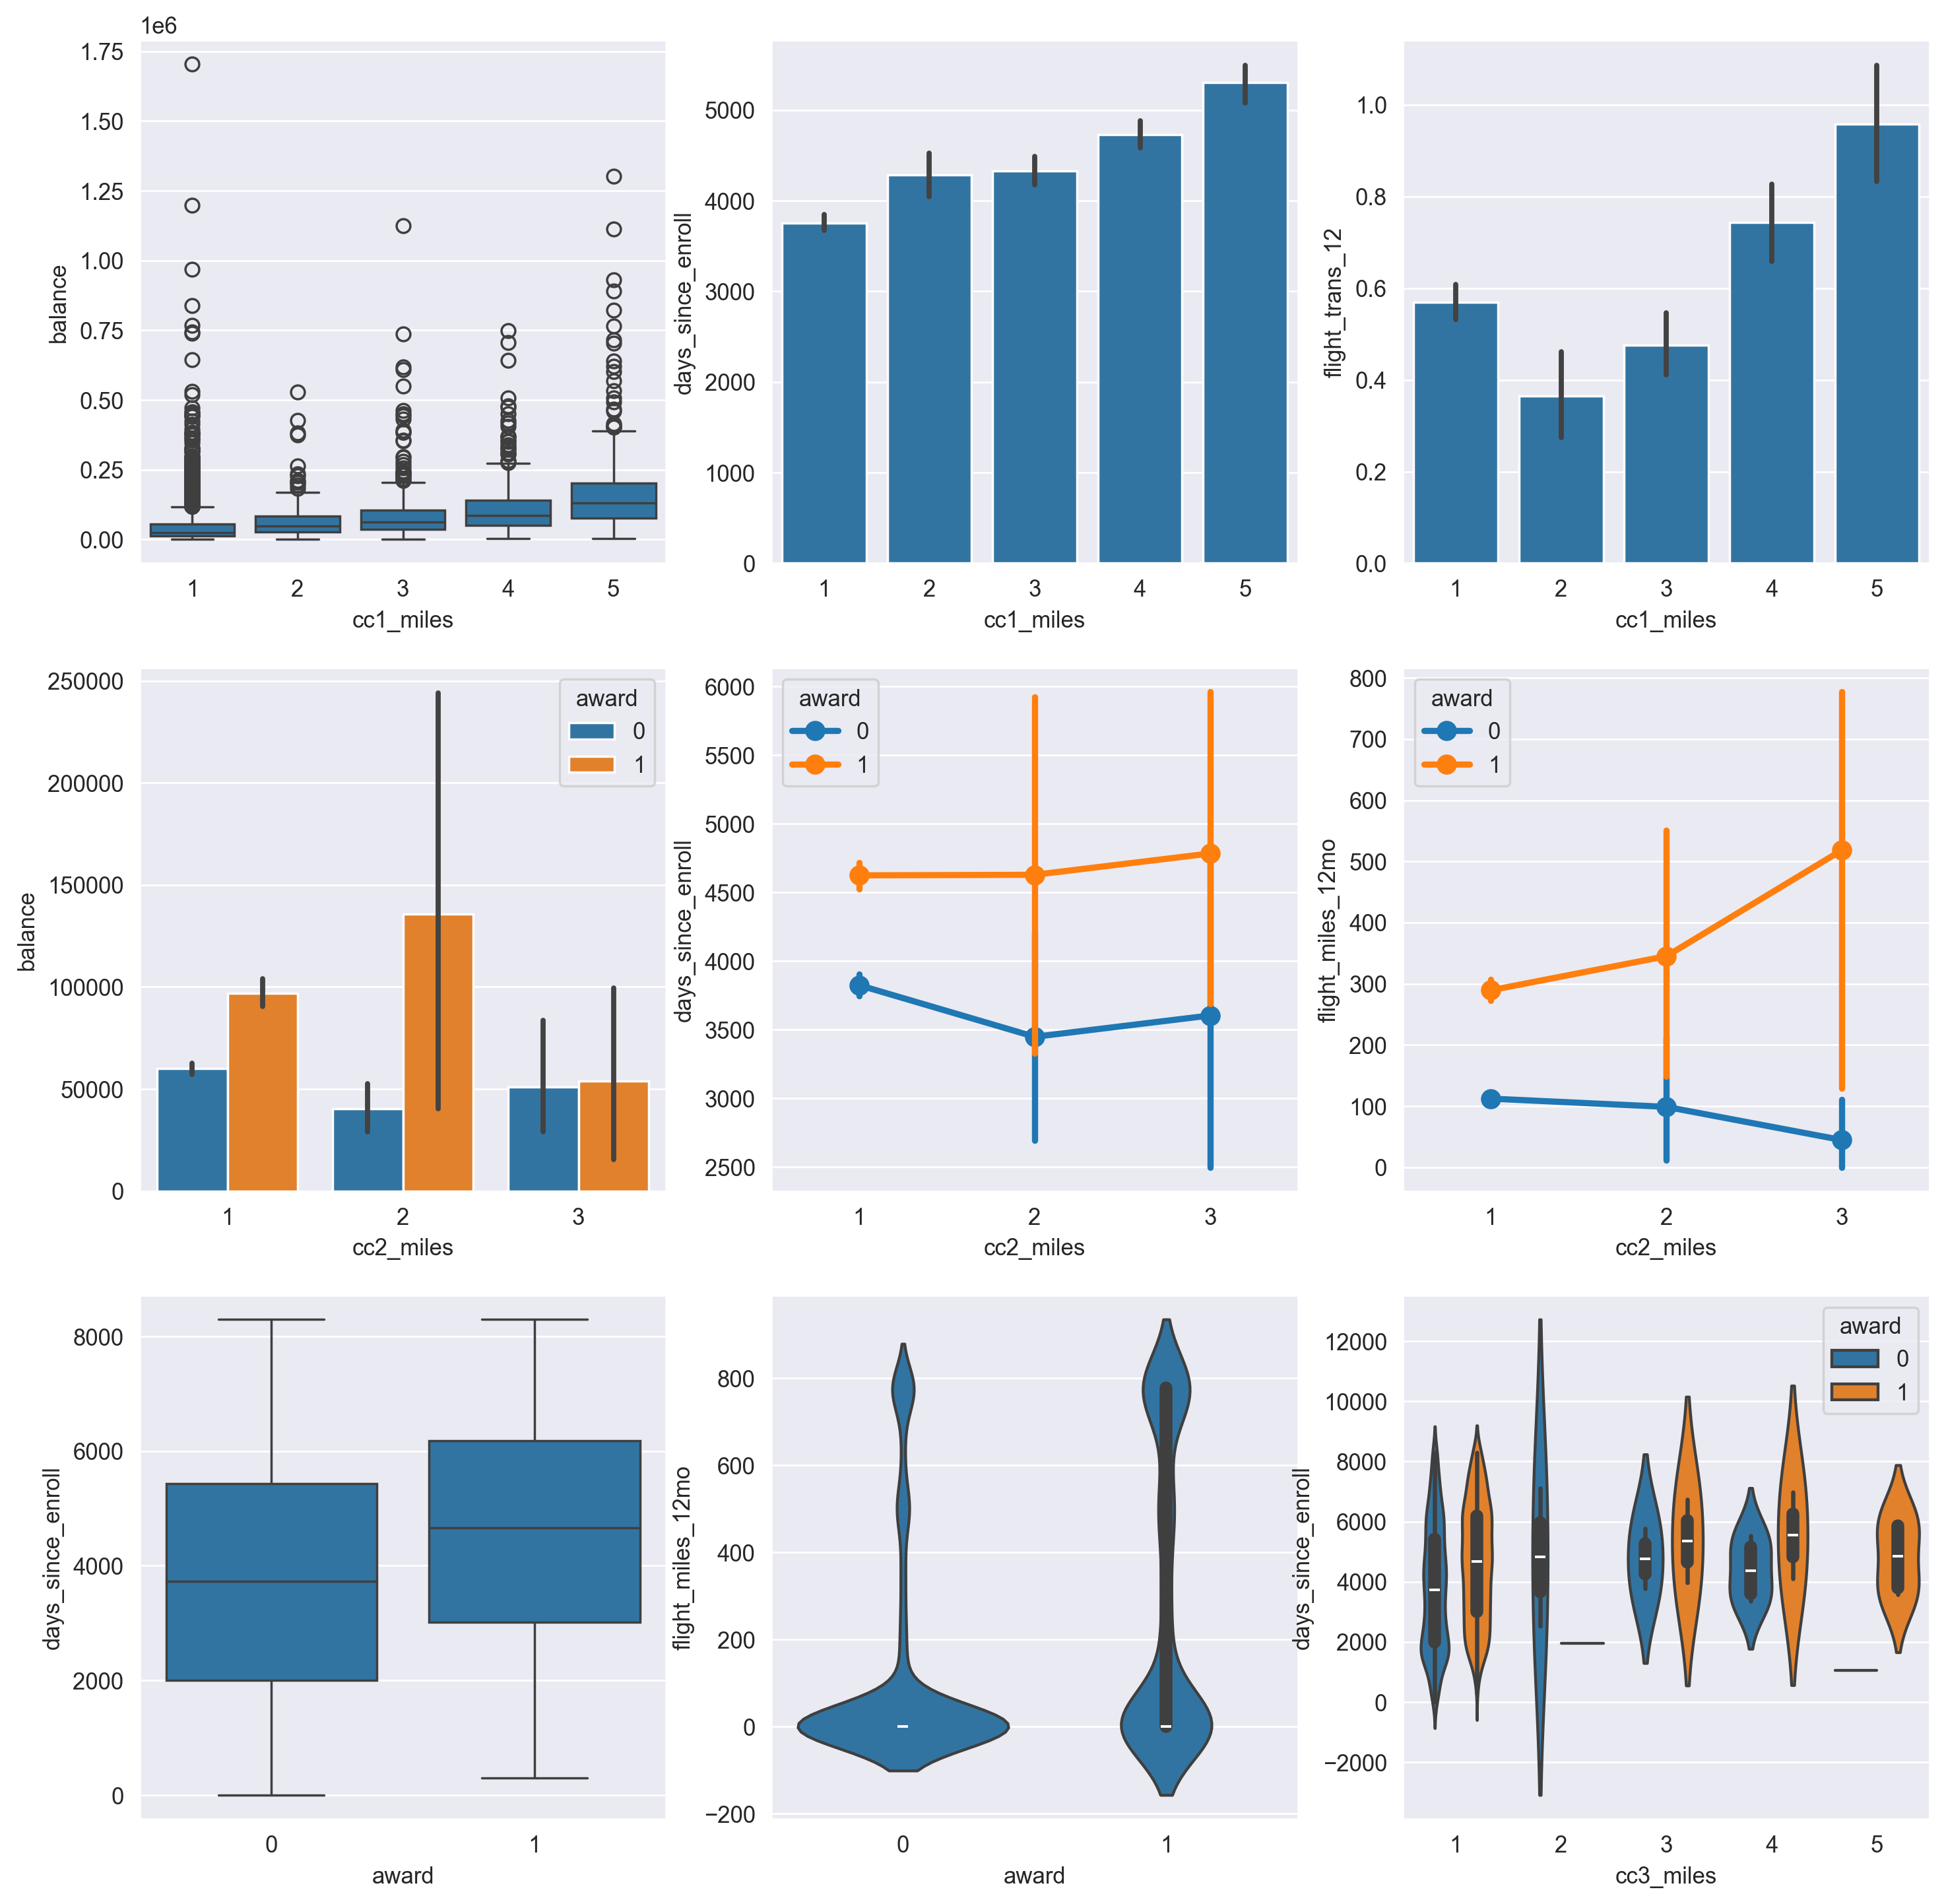

In [209]:
plt.figure(figsize=(14,14))
plt.subplot(3,3,1)
sns.boxplot(x="cc1_miles",y="balance",data=df)
plt.subplot(3,3,2)
sns.barplot(x ='cc1_miles',y ='days_since_enroll', data = df)
plt.subplot(3,3,3)
sns.barplot(x ='cc1_miles',y ='flight_trans_12', data = df)
plt.subplot(3,3,4)
sns.barplot(x ='cc2_miles',y ='balance',hue="award", data = df)
plt.subplot(3,3,5)
sns.pointplot(x ='cc2_miles',y ='days_since_enroll', data = df,hue="award")
plt.subplot(3,3,6)
sns.pointplot(x ='cc2_miles',y ='flight_miles_12mo', data = df,hue="award")
plt.subplot(3,3,7)
sns.boxplot(x ='award',y ='days_since_enroll', data = df)
plt.subplot(3,3,8)
sns.violinplot(x ='award',y ='flight_miles_12mo', data = df)
plt.subplot(3,3,9)
sns.violinplot(x ='cc3_miles',y ='days_since_enroll',hue="award", data = df)
plt.show()

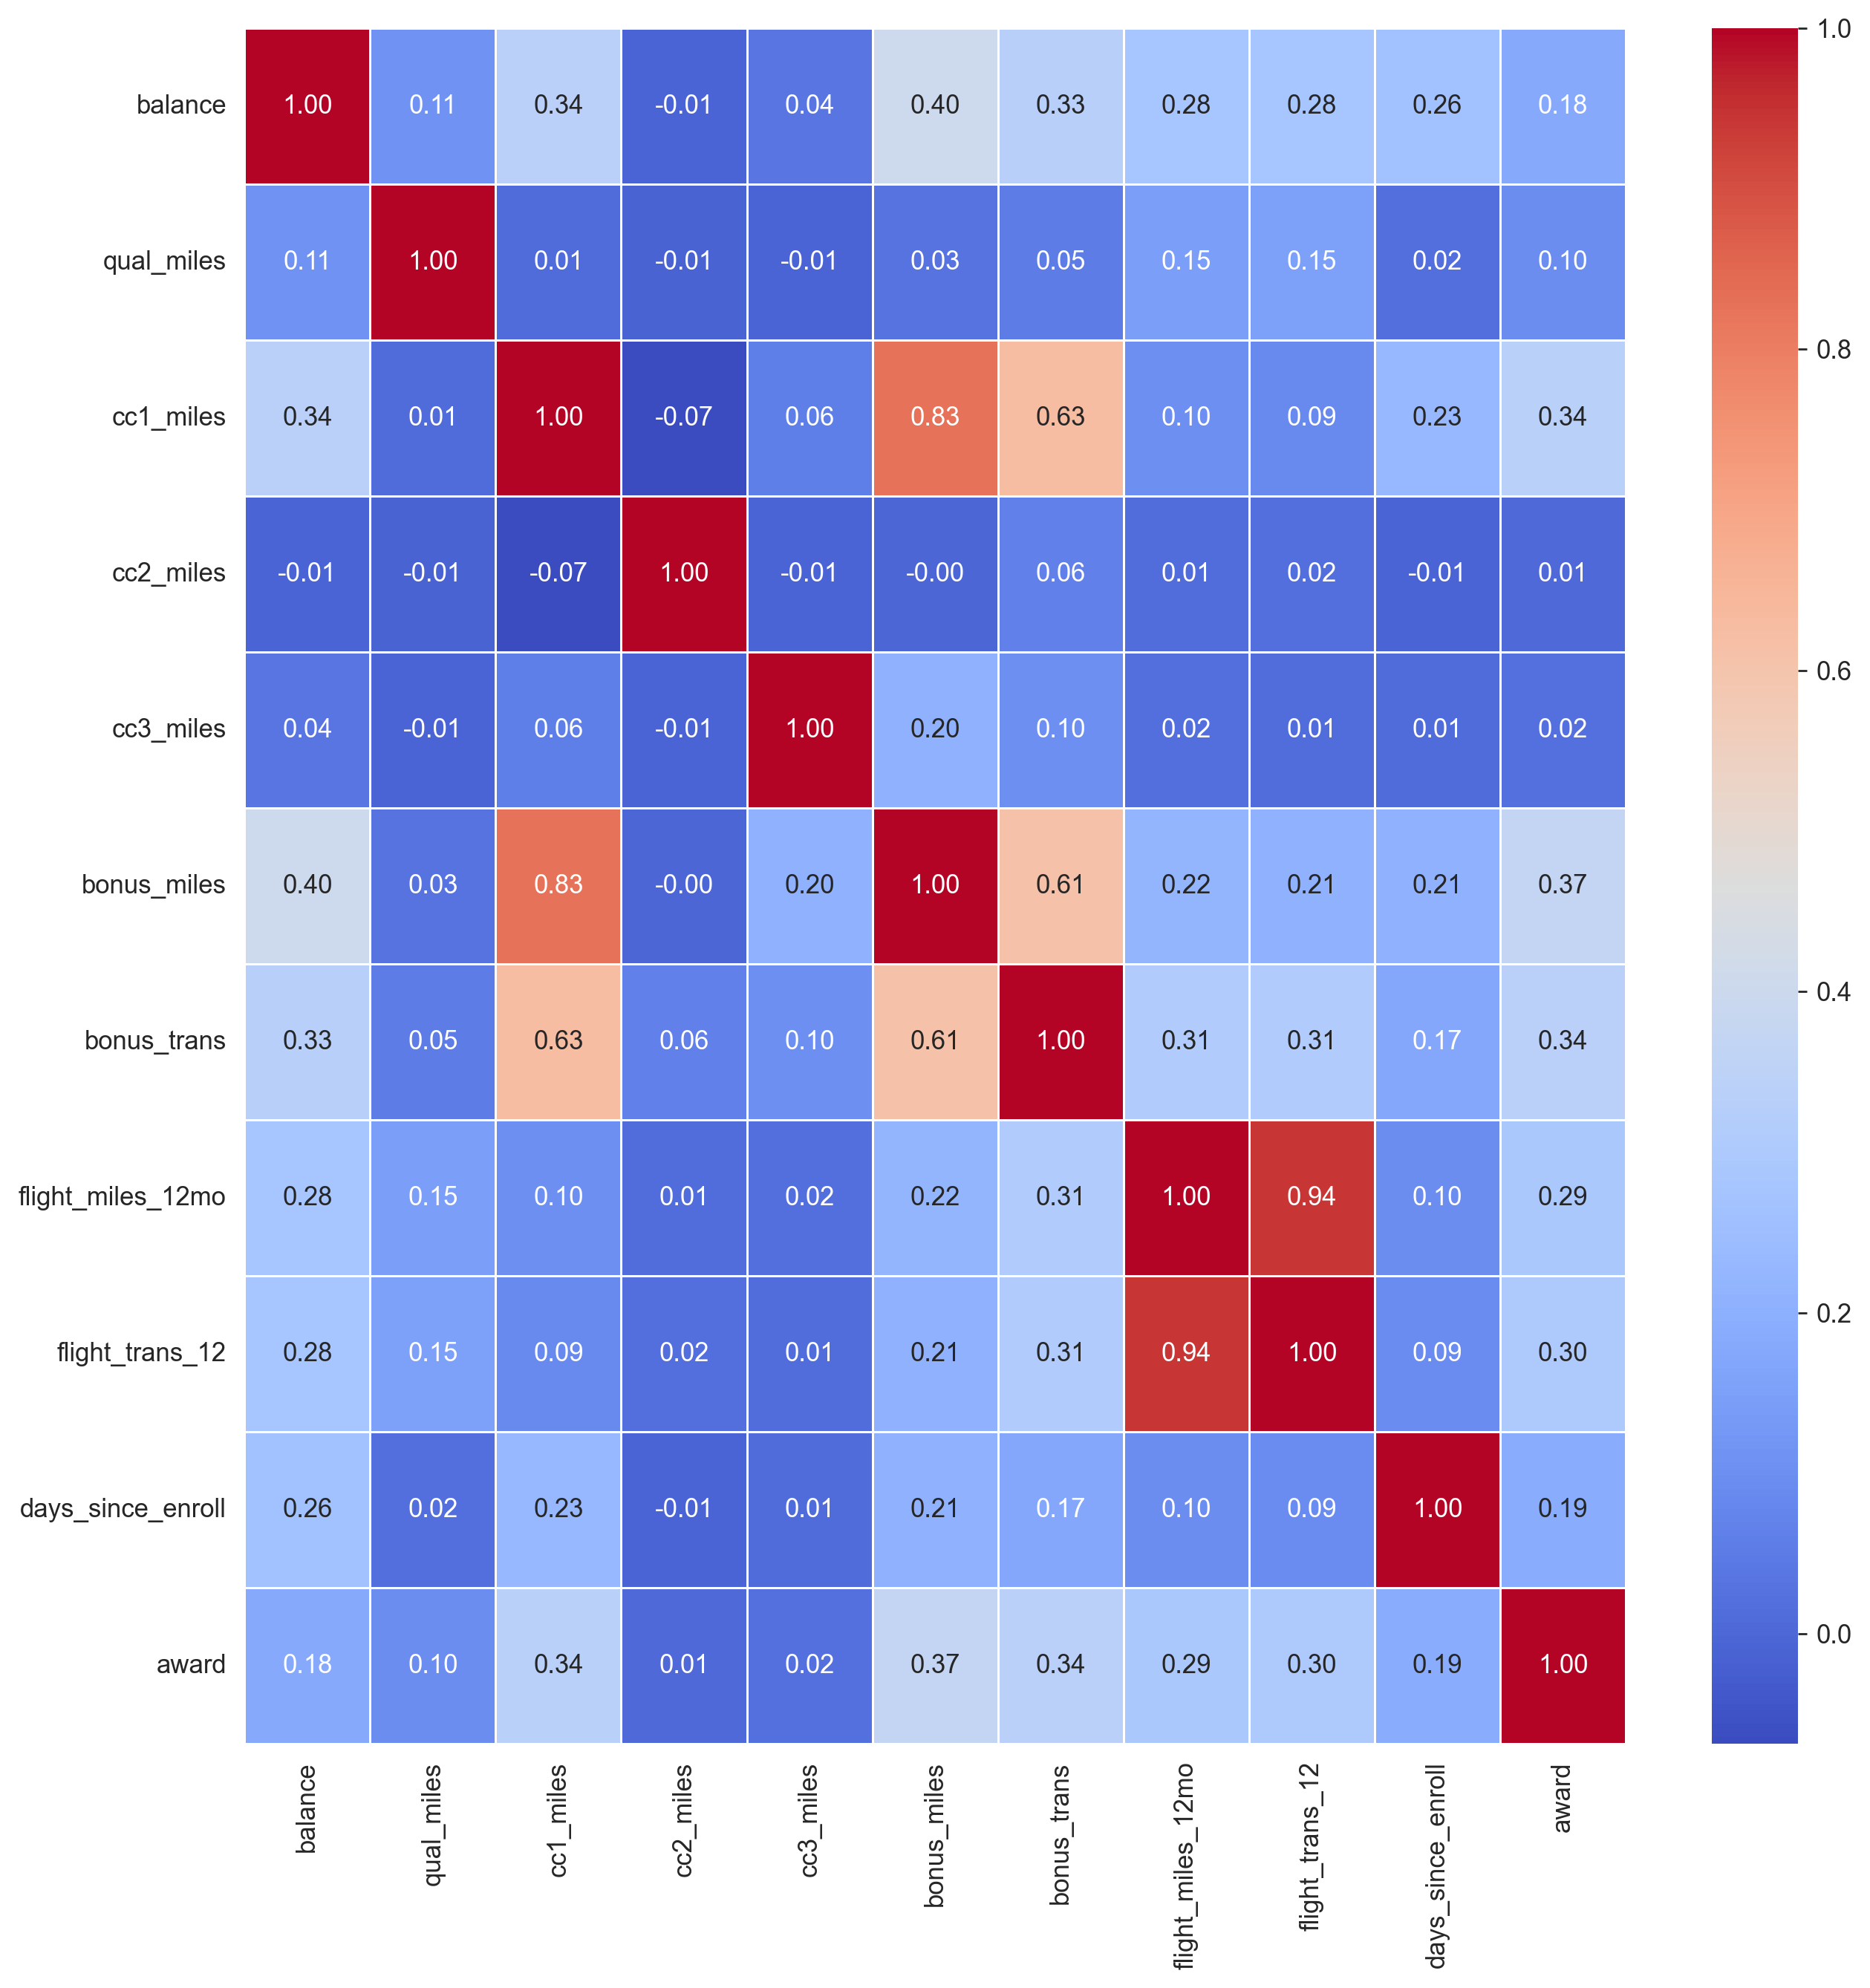

In [210]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.8,fmt=".2f",cmap="coolwarm")
plt.show()

In [212]:
kmeans=KMeans().fit(df)

In [213]:
score=[]
K=range(1,20)

for i in K:
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=3)
    kmeans.fit(df)
    score.append(kmeans.inertia_)

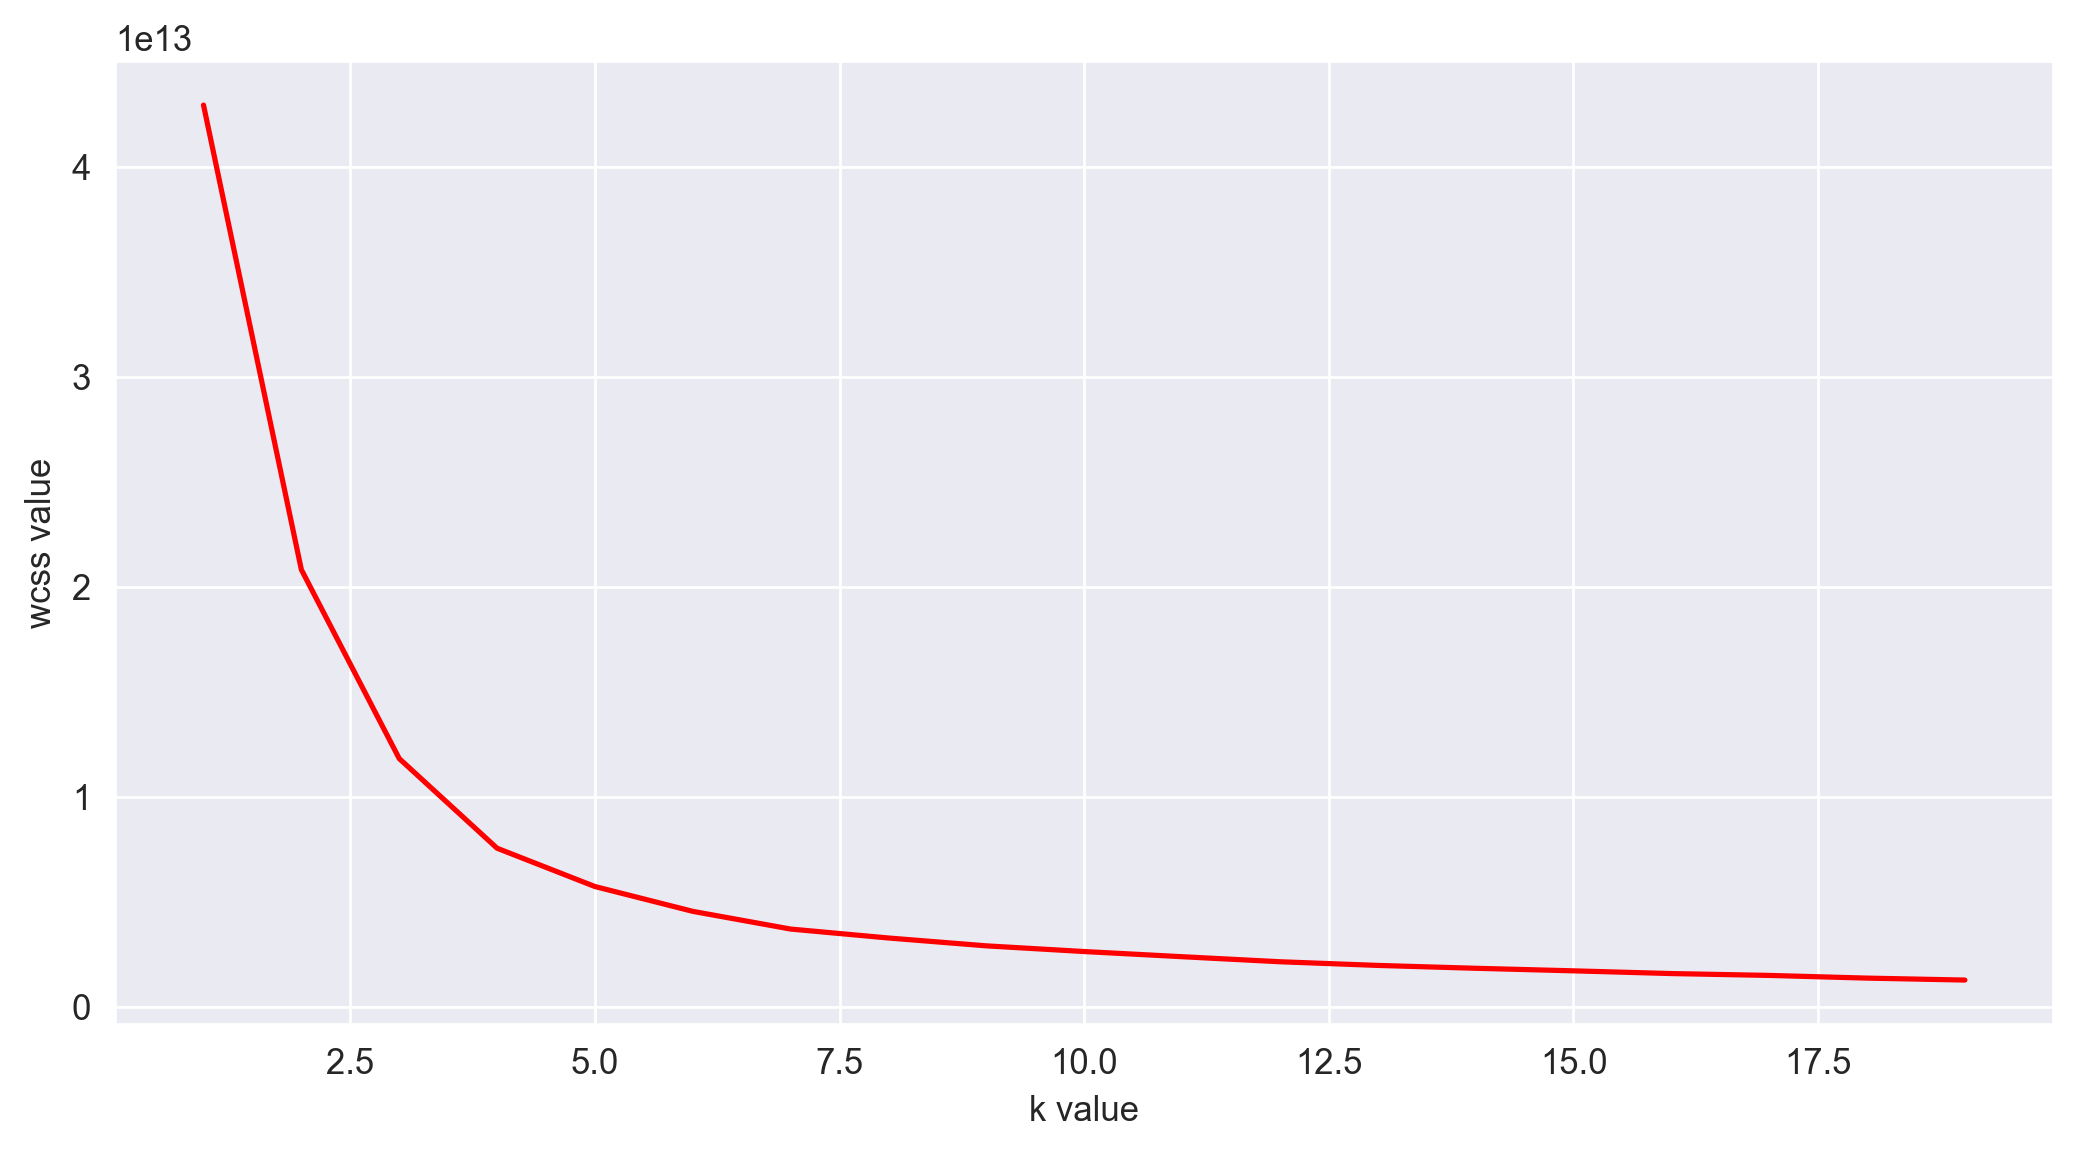

In [214]:
#visualize;

plt.plot(K,score,color="red")
plt.xlabel("k value")
plt.ylabel("wcss value")
plt.show()

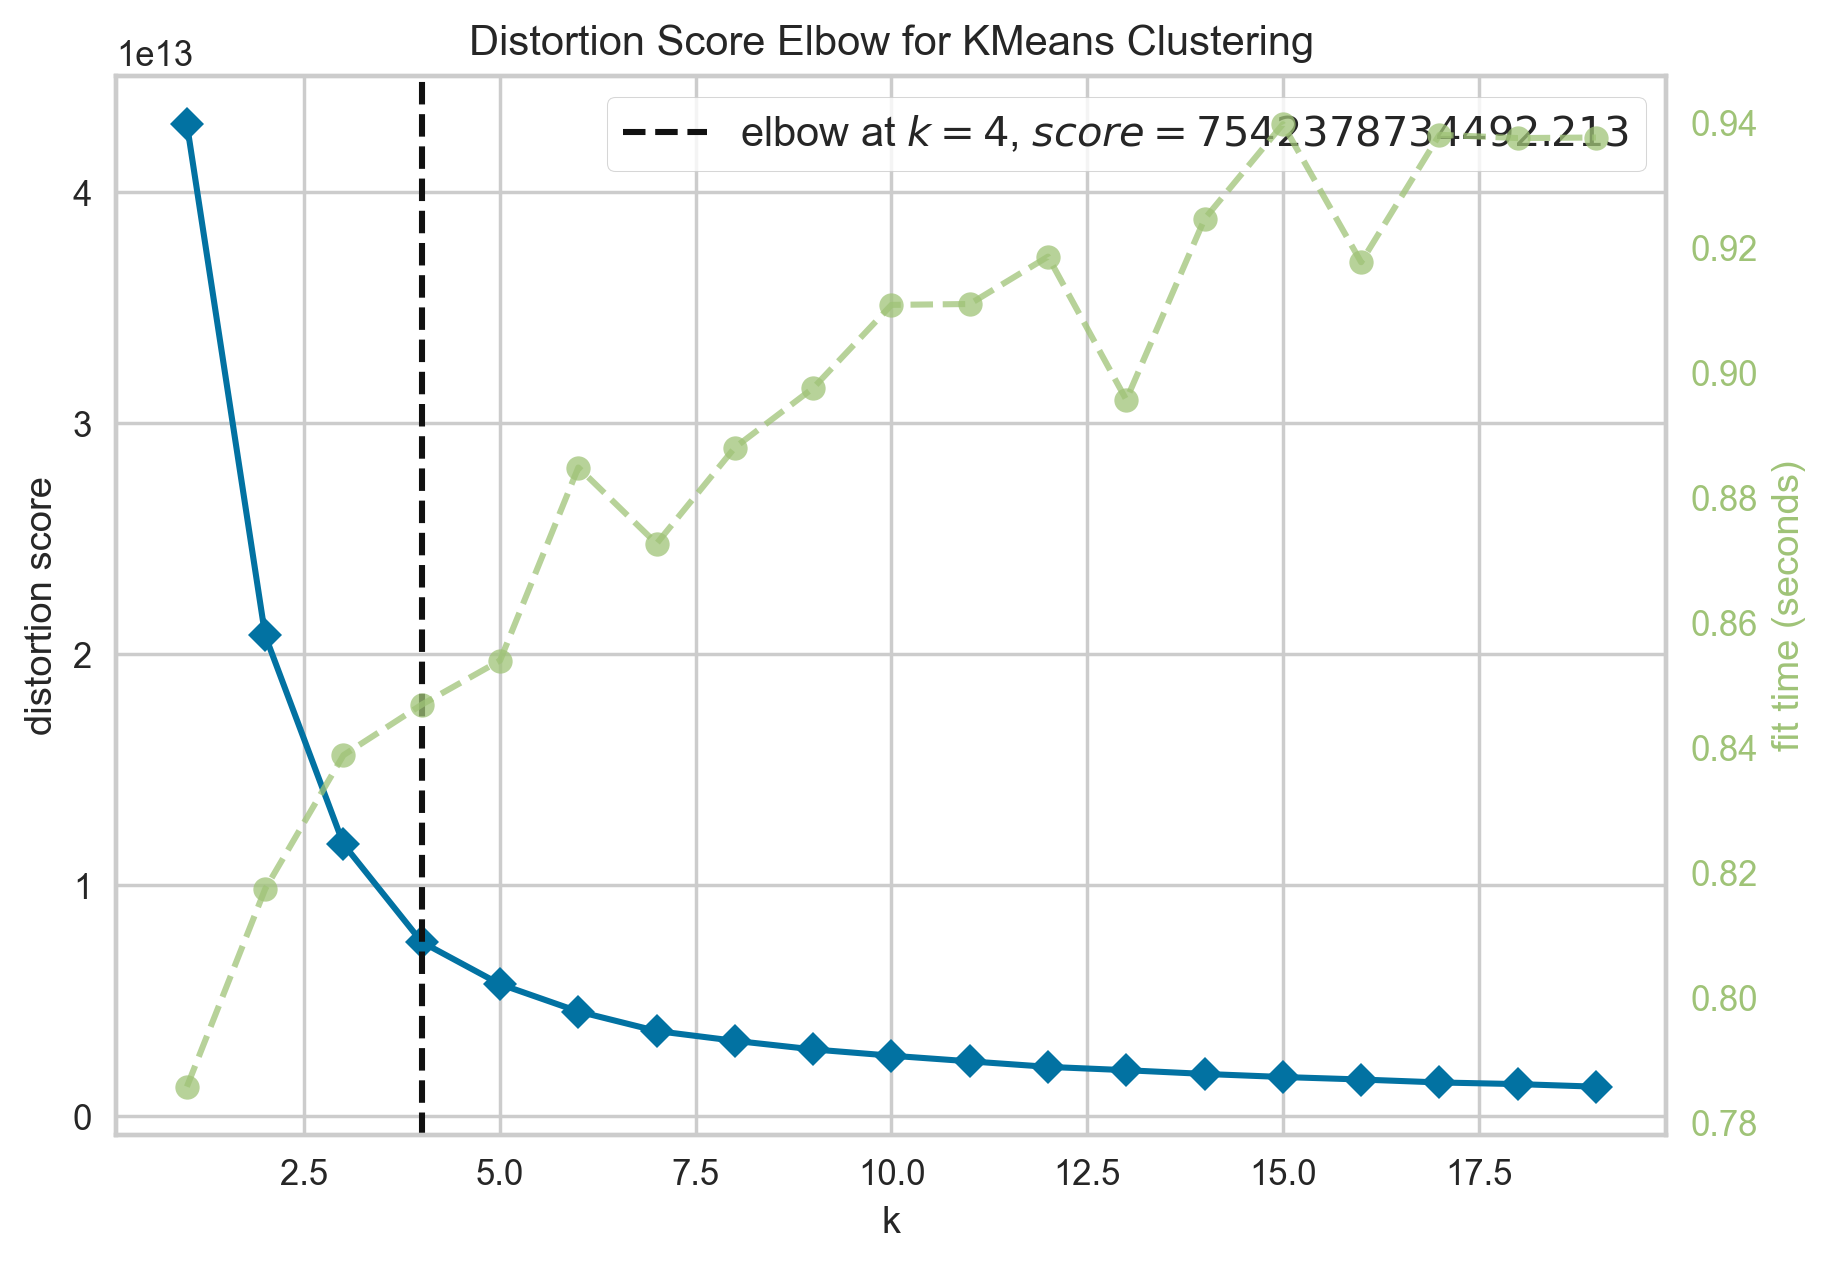

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [216]:
# for K-elbow;
from yellowbrick.cluster import KElbowVisualizer

kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,20))
visualizer.fit(df)
visualizer.poof()


In [217]:
sc=StandardScaler()

In [218]:
x=sc.fit_transform(df)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -6.26143414e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -6.26143414e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -6.26143414e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -6.26143414e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         4.32384386e-01, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -6.26143414e-01, -1.31754109e+00, -7.66919299e-01]])

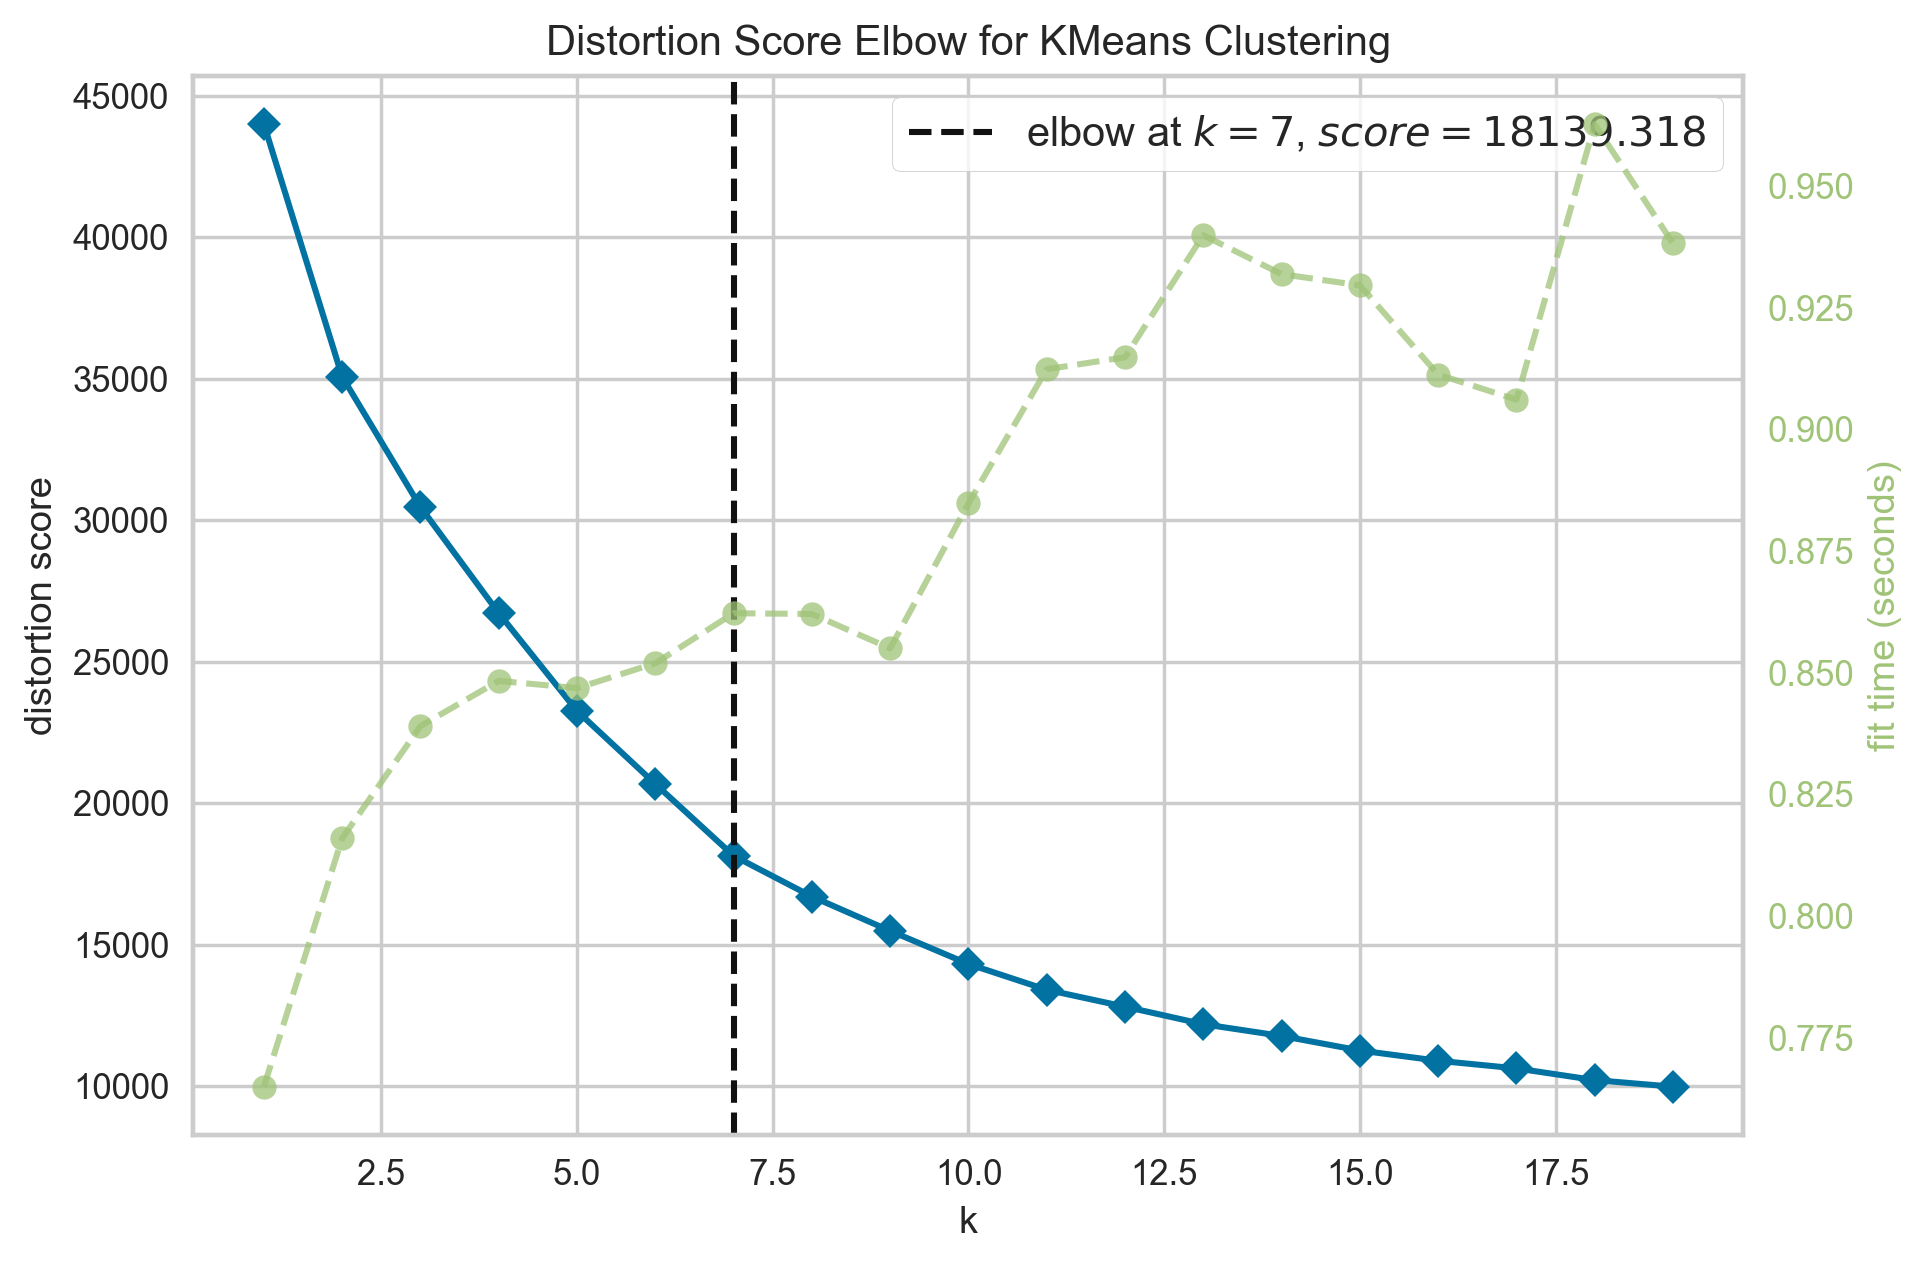

In [219]:
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,20))
visualizer.fit(x)
visualizer.poof()
plt.show()

In [220]:
kmeans=KMeans(n_clusters=4,init="k-means++").fit(df)

In [221]:
cluster=kmeans.labels_
cluster

array([0, 0, 0, ..., 0, 0, 0])

In [222]:
df["cluster_no"]=cluster
df.head()

balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   bonus_trans  flight_miles_12mo  flight_trans_12  days_since_enroll  award  \
0            1                0.0              0.0               7000      0   
1            2                0.0              0.0               6968      0   
2            4                0.0              0.0               7034      0   
3            1                0.0              0.0               6952      0   
4           26              777.5              2.5               6935      1   

   cluster_no  
0           0  
1           0  
2           0  
3           0  
4           1

In [223]:
df.cluster_no.value_counts()

0    2808
1     980
3     185
2      26
Name: cluster_no, dtype: int64

# Hierarcihal Cluster

In [225]:
import scipy.cluster.hierarchy as sch

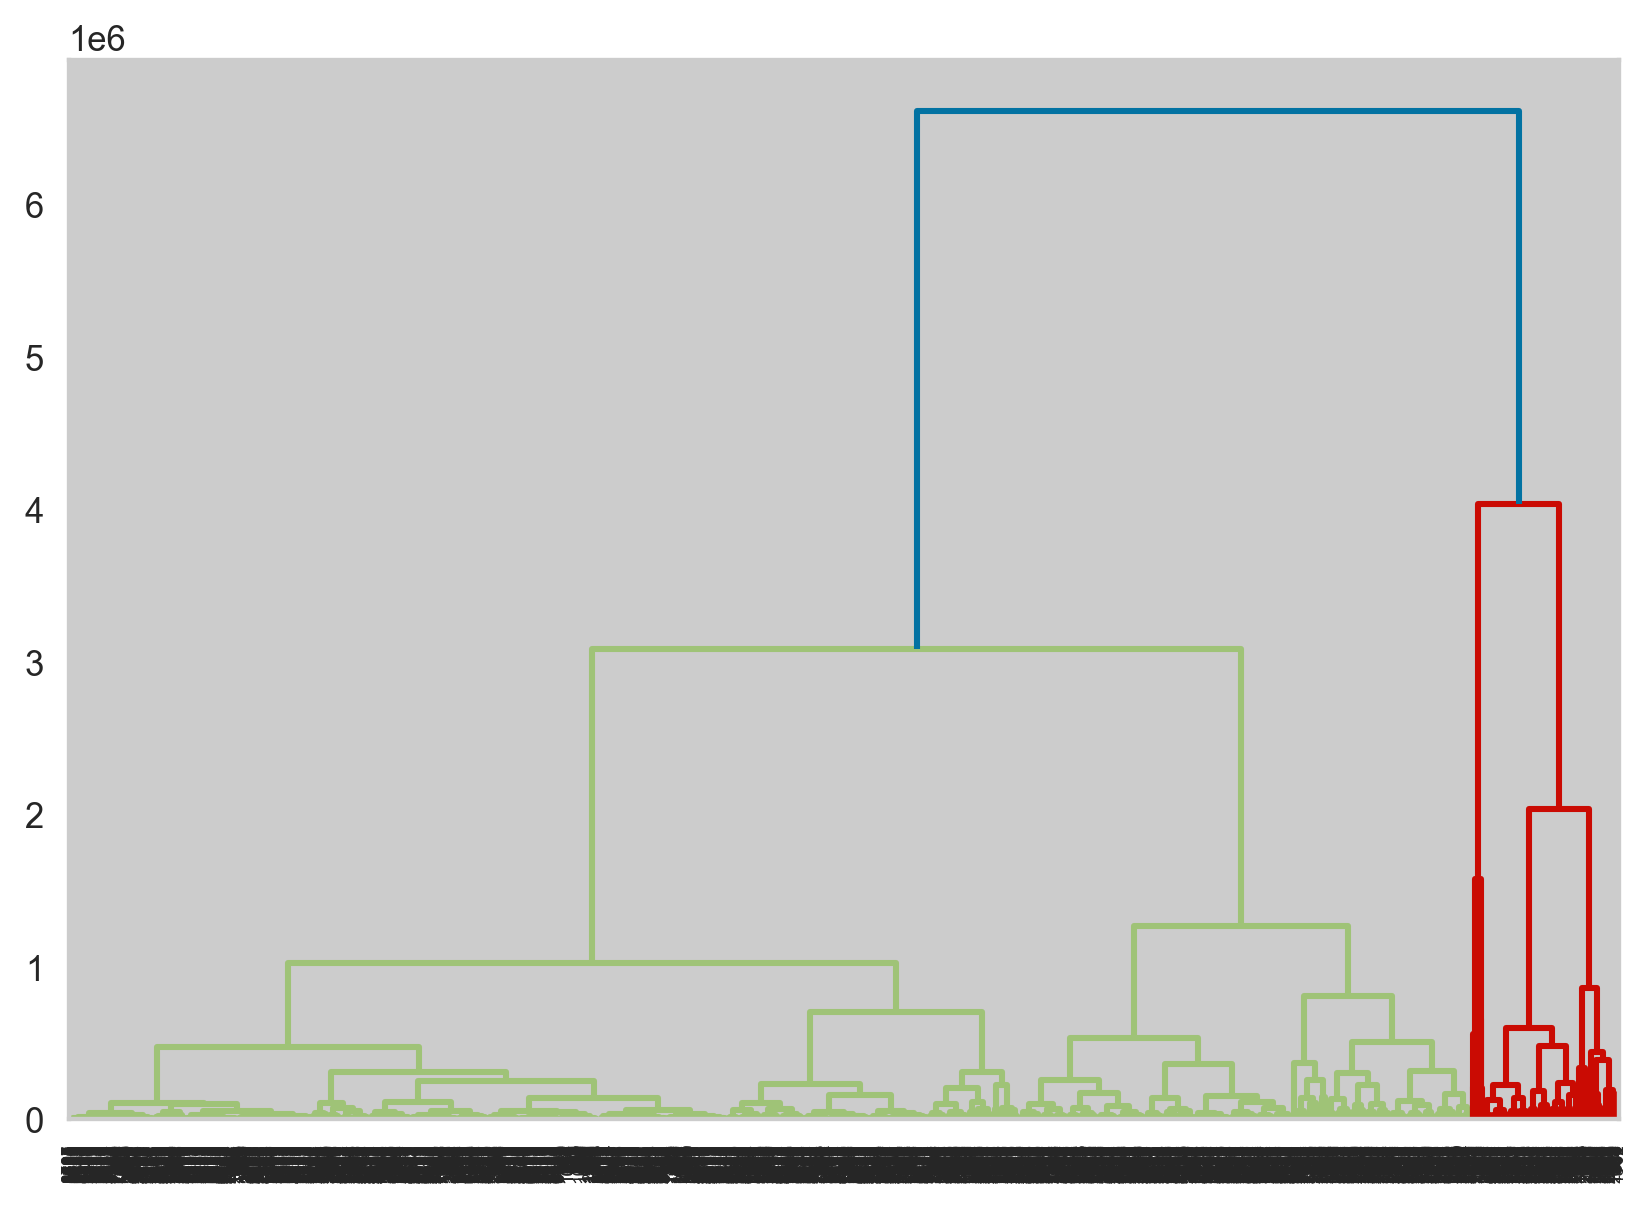

In [249]:
dendogram=sch.dendrogram(sch.linkage(df,method="ward"))

In [231]:
#DBSCAN

In [232]:
from sklearn.cluster import DBSCAN

In [233]:
db = DBSCAN(eps=0.5, min_samples=3)

y = db.fit_predict(x)
y

array([ 0,  0,  0, ...,  6, 23,  0], dtype=int64)

In [234]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -6.26143414e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -6.26143414e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -6.26143414e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -6.26143414e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         4.32384386e-01, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -6.26143414e-01, -1.31754109e+00, -7.66919299e-01]])

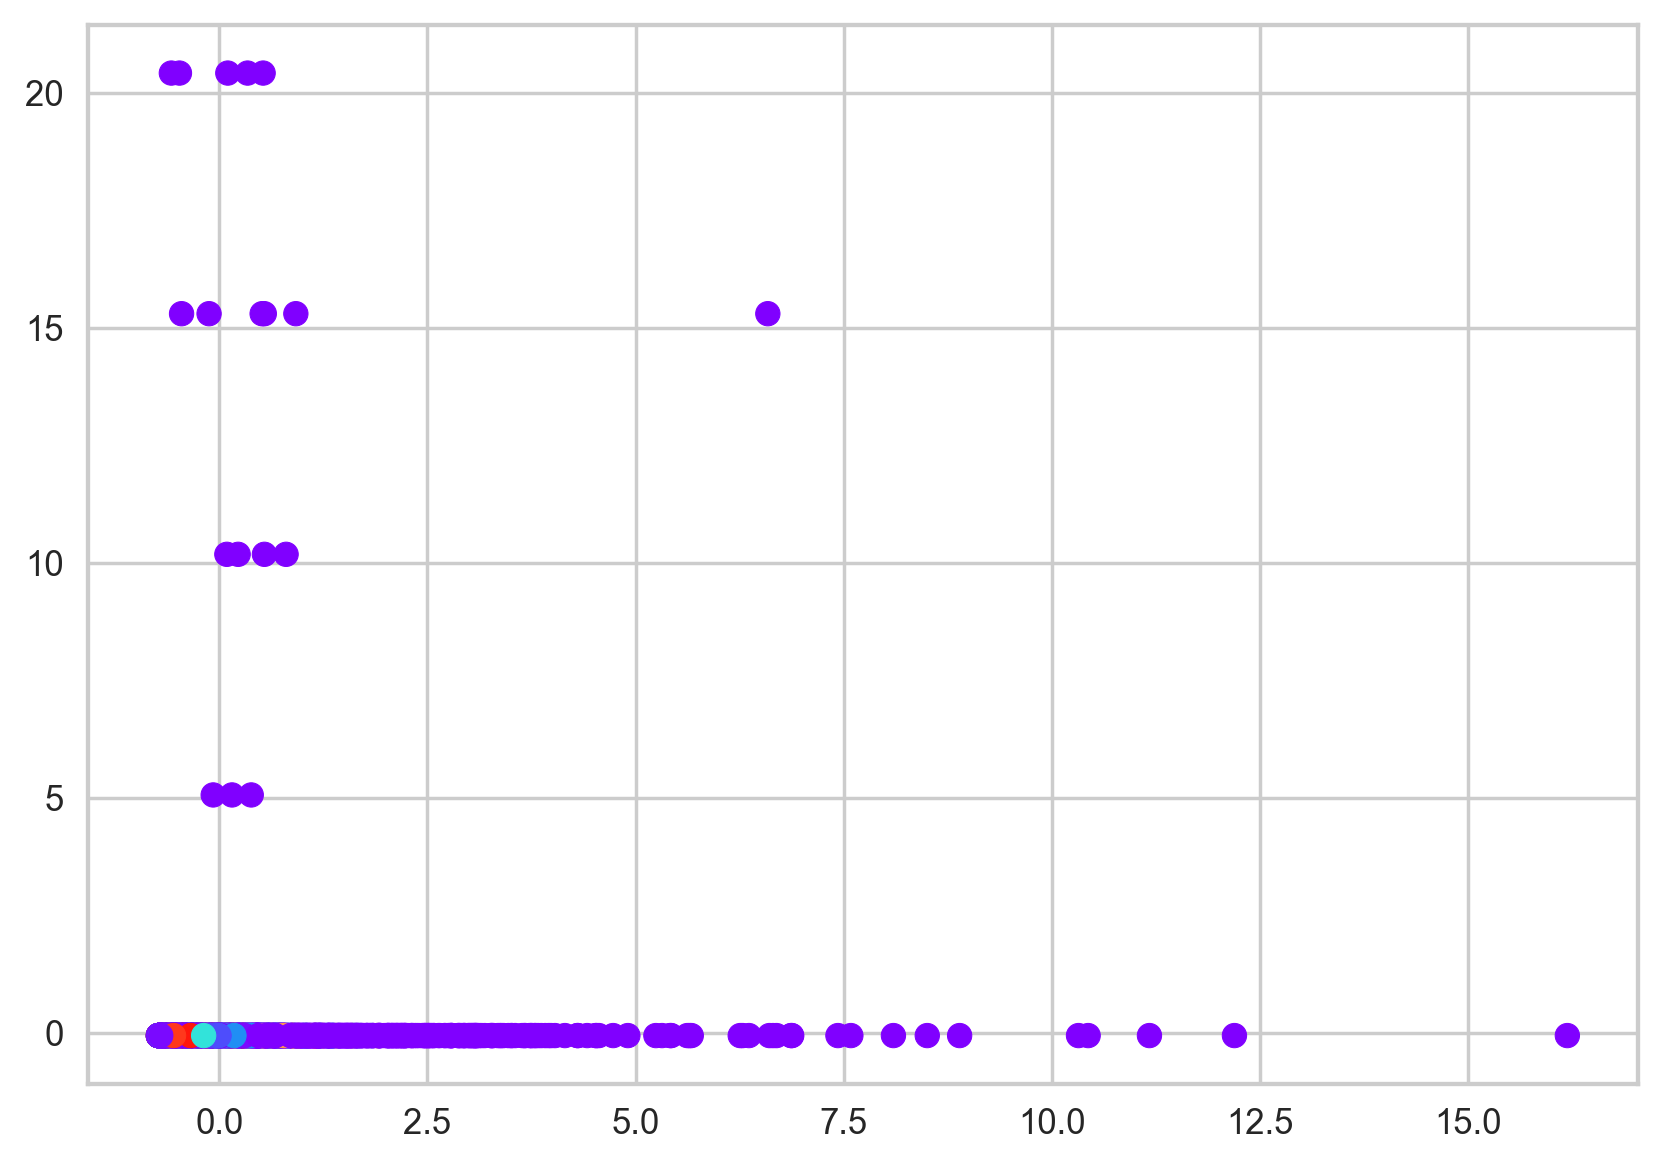

In [235]:
plt.scatter(x[:,0],x[:,4],c = y,cmap = 'rainbow')

In [236]:
from sklearn.metrics import silhouette_score

In [237]:
from sklearn.neighbors import NearestNeighbors

In [238]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)

In [239]:
neigh.kneighbors(x)

(array([[0.        , 0.11706315, 0.12034246],
        [0.        , 0.11918211, 0.11948194],
        [0.        , 0.16897325, 0.19763383],
        ...,
        [0.        , 0.16614779, 0.28024323],
        [0.        , 0.25725534, 0.35888565],
        [0.        , 0.00270574, 0.0112955 ]]),
 array([[   0,  378,  363],
        [   1,    3,  363],
        [   2,  338,  368],
        ...,
        [3996, 3877, 3800],
        [3997, 3623, 3414],
        [3998, 3491, 3455]], dtype=int64))

In [240]:
d,index = neigh.kneighbors(x)

In [241]:
d

array([[0.        , 0.11706315, 0.12034246],
       [0.        , 0.11918211, 0.11948194],
       [0.        , 0.16897325, 0.19763383],
       ...,
       [0.        , 0.16614779, 0.28024323],
       [0.        , 0.25725534, 0.35888565],
       [0.        , 0.00270574, 0.0112955 ]])

In [242]:
d[:,1]

array([0.11706315, 0.11918211, 0.16897325, ..., 0.16614779, 0.25725534,
       0.00270574])

In [243]:
distance = np.sort(d[:,1])
distance

array([0.00000000e+00, 0.00000000e+00, 2.26431613e-03, ...,
       5.13809981e+00, 6.47183897e+00, 6.51619558e+00])

Text(0.5, 1.0, 'K-Distance Graph')

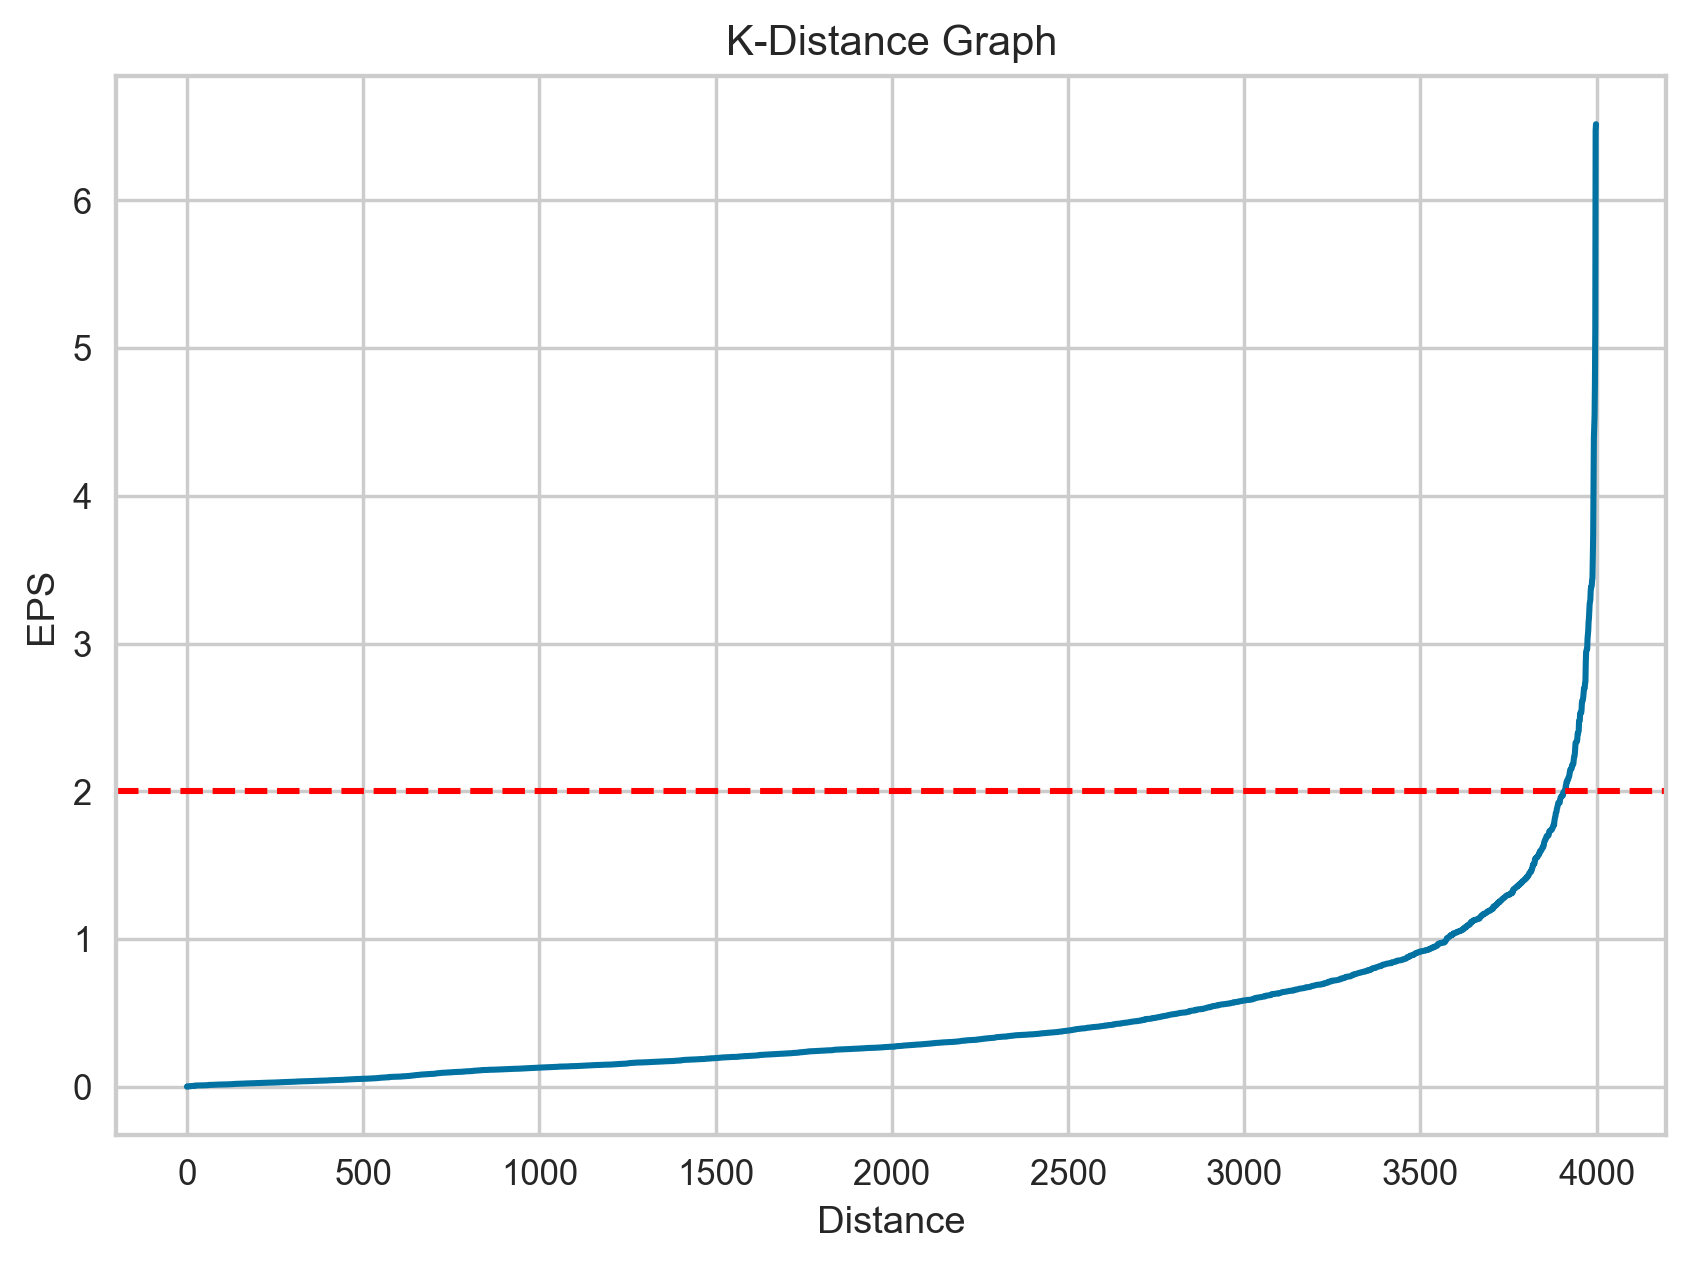

In [244]:
plt.plot(distance)
plt.axhline(y=2, linestyle = '--', color = 'red')
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

In [245]:
db = DBSCAN(eps=6,min_samples=3)
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

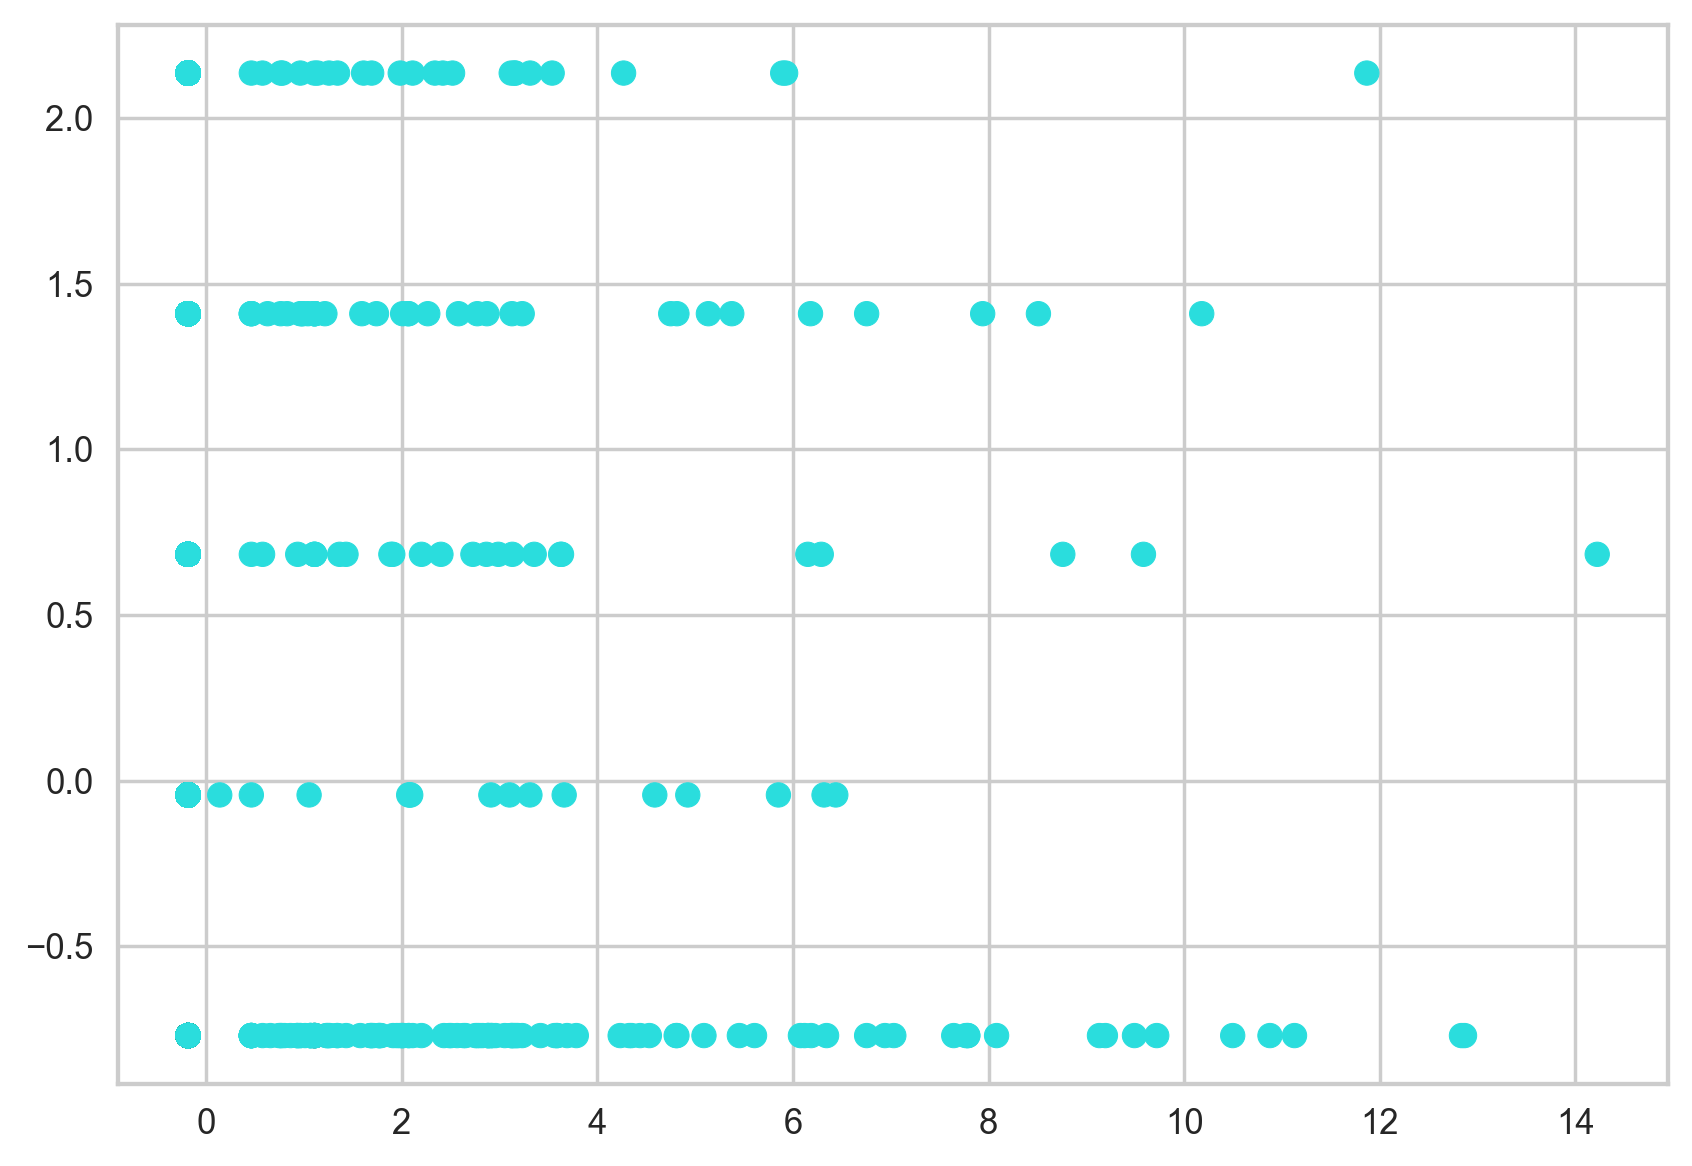

In [246]:
plt.scatter(x[:,1],x[:,2],c = yp, cmap='rainbow')

In [247]:
silhouette_score(x,yp)

0.5146439793149952

In [250]:
df['cluster_no'].value_counts()

0    2808
1     980
3     185
2      26
Name: cluster_no, dtype: int64

In [251]:
df.groupby('cluster_no').agg('mean')

balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  \
cluster_no                                                               
0            30972.230413  101.698006   1.668091   1.016382   1.004986   
1           128269.936735  219.413265   2.941837   1.009184   1.032653   
2           842320.230769  512.692308   3.346154   1.000000   1.115385   
3           323009.848649  337.248649   3.145946   1.016216   1.000000   

             bonus_miles  bonus_trans  flight_miles_12mo  flight_trans_12  \
cluster_no                                                                  
0           10102.236467     9.267450         129.675214         0.440171   
1           31243.133673    16.217347         267.023469         0.864796   
2           57797.192308    22.000000         576.442308         1.865385   
3           43644.118919    18.286486         385.113514         1.262162   

            days_since_enroll     award  
cluster_no                               
0                 3784.921652  0.324074  
1                 4745.401020  0.441837  
2                 6463.000000  0.846154  
3                 5532.583784  0.627027

<Axes: >

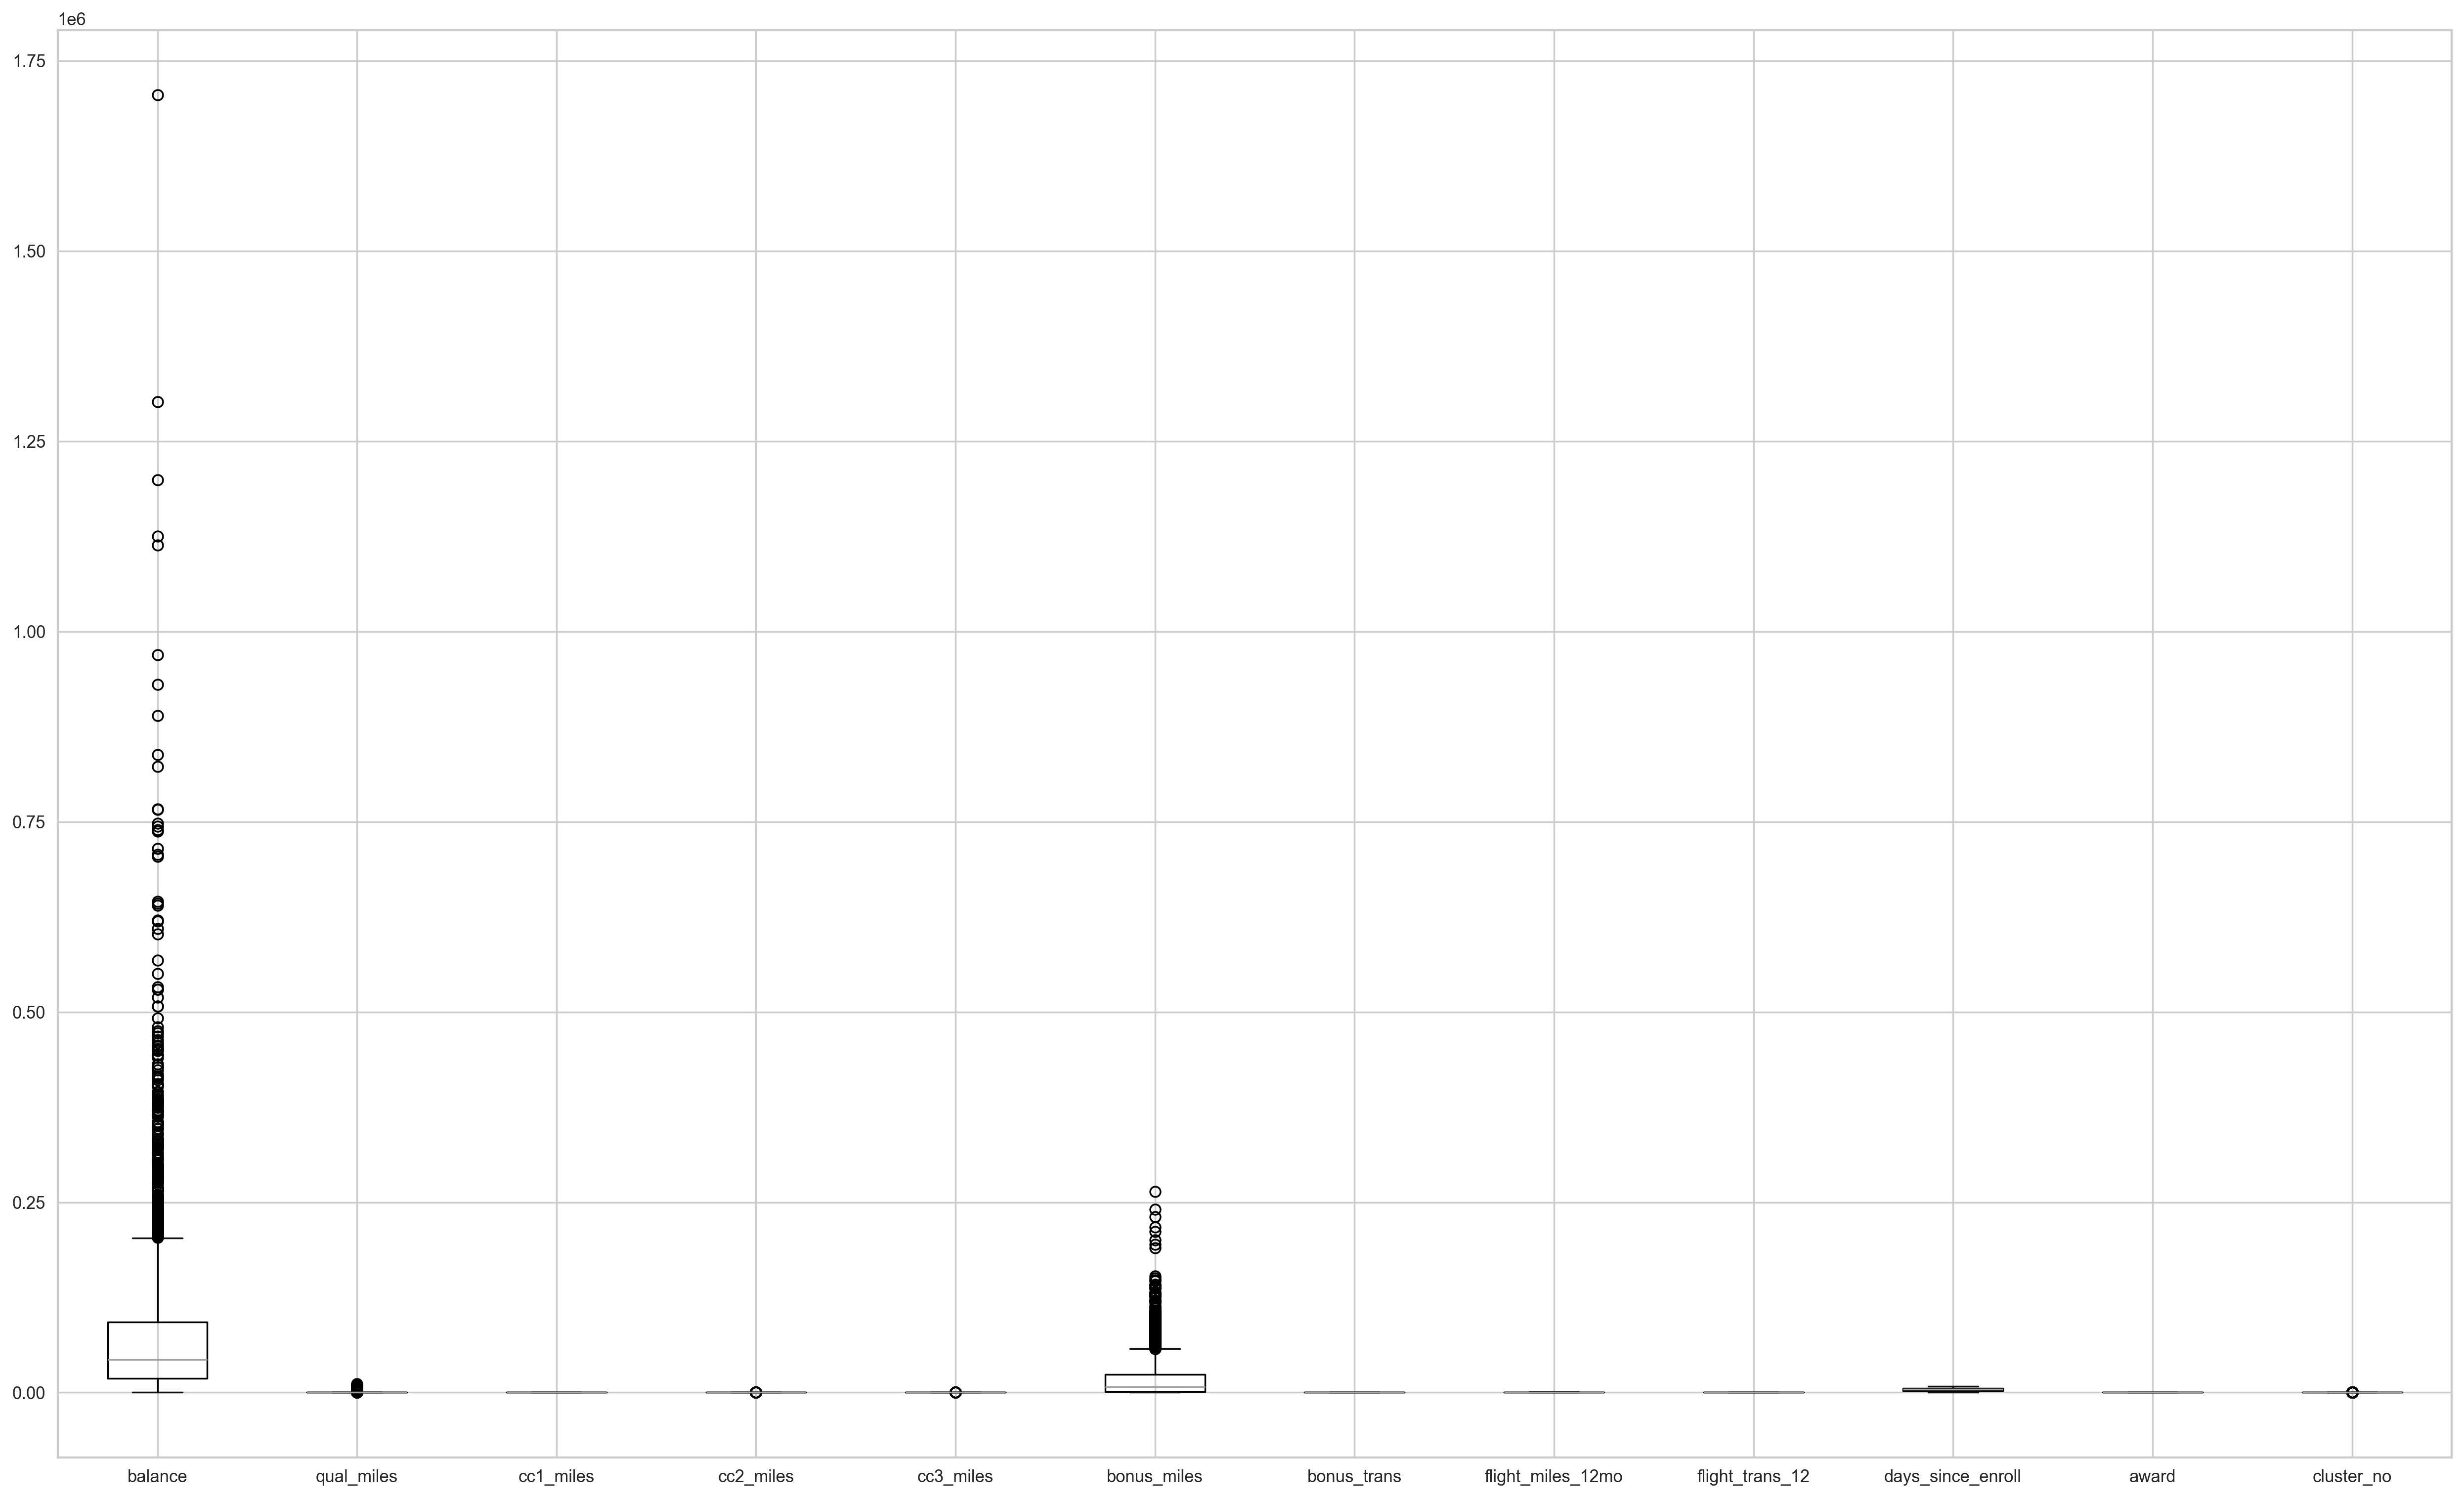

In [253]:
df.boxplot(figsize=(25,15))